In [1]:
import matplotlib.pyplot as plt
import numpy as np
from svdutils_Zhicai import train_model, get_err, train_model_bias, get_err_bias

## Load the data

In [2]:
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies

In [3]:
## read the movies.txt file, get the list of all movies ids, names, and their genres
ratings_all = np.loadtxt('data/data.txt')
movies_all = []
with open('data/movies.txt') as f:
    lines = f.readlines()  
    for line in lines:
        line_items = line.strip('\n').split(';')
        line_items_int_str = []
        for idx in range(len(line_items)):
            if idx == 1:
                line_items_int_str.append(line_items[idx][0:line_items[idx].find('(')]) #remove the year of the movie from the name
            else:
                line_items_int_str.append(int(line_items[idx]))
        movies_all.append(line_items_int_str)

In [4]:
## 10 random movies, 10 most popular movies, and 10 best movies
average_ratings_all = np.zeros(len(movies_all))
num_of_ratings_all = np.zeros(len(movies_all))
for rating in ratings_all:
    num_of_ratings_all[int(rating[1])-1] += 1
    average_ratings_all[int(rating[1])-1] += rating[2]
average_ratings_all = np.divide(average_ratings_all, num_of_ratings_all)
id_most_popular_10 = num_of_ratings_all.argsort()[-10:][::-1]
id_best_10 = average_ratings_all.argsort()[-10:][::-1]

name_most_popular_10 = []
for idx in range(len(id_most_popular_10)):
    name_most_popular_10.append(movies_all[id_most_popular_10[idx]][1]+"(%.0f, %.1f)"%(num_of_ratings_all[id_most_popular_10[idx]], average_ratings_all[id_most_popular_10[idx]]))
    
name_best_10 = []
for idx in range(len(id_best_10)):
    name_best_10.append(movies_all[id_best_10[idx]][1]+"(%.0f, %.1f)"%(num_of_ratings_all[id_best_10[idx]], average_ratings_all[id_best_10[idx]]))
    #print(average_ratings_all[id_best_10[idx]])
    #print(num_of_ratings_all[id_best_10[idx]])

## 10 random movies
id_all = np.arange(len(movies_all))
np.random.shuffle(id_all)
id_random10 = id_all[:10]
name_random10 = []
for idx in range(len(id_random10)):
    name_random10.append(movies_all[id_random10[idx]][1]+"(%.0f, %.1f)"%(num_of_ratings_all[id_random10[idx]], average_ratings_all[id_random10[idx]]))

## 10 random movies of genre = action
print(id_all)
id_random_action = []
id_random_documentary = []
id_random_drama = []
name_random_action = []
name_random_documentary = []
name_random_drama = []

for idx in id_all:
    if movies_all[idx][3] == 1 and num_of_ratings_all[idx] > 50:
        id_random_action.append(idx)
        name_random_action.append(movies_all[idx][1]+"(%.0f, %.1f)"%(num_of_ratings_all[idx], average_ratings_all[idx]))
    if movies_all[idx][9] == 1 and num_of_ratings_all[idx] > 20:
        id_random_documentary.append(idx)
        name_random_documentary.append(movies_all[idx][1]+"(%.0f, %.1f)"%(num_of_ratings_all[idx], average_ratings_all[idx]))
    if movies_all[idx][10] == 1 and num_of_ratings_all[idx] > 50:
        id_random_drama.append(idx)
        name_random_drama.append(movies_all[idx][1]+"(%.0f, %.1f)"%(num_of_ratings_all[idx], average_ratings_all[idx]))

id_random10_action = id_random_action[:10]
name_random10_action = name_random_action[:10]
id_random10_documentary = id_random_documentary[:10]
name_random10_documentary = name_random_documentary[:10]
id_random10_drama = id_random_drama[:10]
name_random10_drama = name_random_drama[:10]

print('10 random movies')
print(id_random10)
print(name_random10)
print('10 random action movies')
print(id_random10_action)
print(name_random10_action)
print('10 random documentary movies')
print(id_random10_documentary)
print(name_random10_documentary)
print('10 random drama movies')
print(id_random10_drama)
print(name_random10_drama)

print('10 most popular movies')
print(id_most_popular_10)
print(name_most_popular_10)
print('10 best movies')
print(id_best_10)
print(name_best_10)

[1657  319 1475 ...  297 1491 1276]
10 random movies
[1657  319 1475 1506  121 1612  827 1470   75  427]
['Substance of Fire, The (3, 3.0)', 'Paradise Lost: The Child Murders at Robin Hood Hills (20, 4.0)', 'Raw Deal (1, 2.0)', 'Three Lives and Only One Death (1, 3.0)', 'Cable Guy, The (106, 2.3)', 'Tokyo Fist (1, 4.0)', 'Alaska (13, 2.7)', 'Hideaway (9, 2.4)', "Carlito's Way (54, 3.4)", 'Harold and Maude (121, 3.8)']
10 random action movies
[209, 270, 750, 299, 577, 322, 1015, 402, 176, 27]
['Indiana Jones and the Last Crusade (331, 3.9)', 'Starship Troopers (211, 3.2)', 'Tomorrow Never Dies (180, 3.4)', 'Air Force One (431, 3.6)', 'Demolition Man (92, 3.2)', "Dante's Peak (240, 2.9)", 'Con Air (137, 3.5)', 'Batman (201, 3.4)', 'Good, The Bad and The Ugly, The (137, 3.9)', 'Apollo 13 (276, 3.9)']
10 random documentary movies
[644, 1141, 633, 846, 1064, 1083, 812, 47, 643, 31]
['Paris Is Burning (27, 3.8)', 'When We Were Kings (44, 4.0)', "Microcosmos: Le peuple de l'herbe (24, 3.8)", 

## some help functions to do visualization

In [ ]:
def visualize_V(Vtilt, id_movie, name_movie, figname):
    """
    2D visualizatin of Vtilt.
    Input: 
    Vtilt: 2xn matrix 
    id_movie: the id of the movies to visualize
    name_movie: the names of the movies to visualize
    figname: the figure name you want to save
    """   
    #normalize Vtilt such that each row has variance of 1.0
    Vtilt_row_means = np.mean(Vtilt, axis=1)
    Vtilt_row_std = np.std(Vtilt, axis=1)
    Vtiltp = np.zeros_like(Vtilt)
    for irow in range(len(Vtilt)):
        Vtiltp[irow] = np.divide(Vtilt[irow] - Vtilt_row_means[irow],Vtilt_row_std[irow])
        
    fig = plt.figure()
    fig.set_size_inches(40,30)
    ax = fig.add_subplot(1, 1, 1)
    for idx in range(len(id_movie)):
        plt.scatter(Vtiltp[0][id_movie[idx]], Vtiltp[1][id_movie[idx]], s=5000, marker='o', color='blue')
        plt.text(Vtiltp[0][id_movie[idx]], Vtiltp[1][id_movie[idx]]-0.3, name_movie[idx], 
                 rotation=45, bbox=dict(facecolor='red', alpha=0.05), fontsize=50,
                 horizontalalignment='center', verticalalignment='center')
        #print(str(Vtiltp[0][id_movie[idx]])+', '+str(Vtiltp[1][id_movie[idx]])+', '+name_movie[idx])
    #plt.xlim(-1.0*np.amax(Vtiltp[0]), np.amax(Vtiltp[0]))
    #plt.ylim(-1.0*np.amax(Vtiltp[1]), np.amax(Vtiltp[1]))
    #plt.xlim(np.amin(Vtiltp[0]), np.amax(Vtiltp[0]))
    #plt.ylim(np.amin(Vtiltp[1]), np.amax(Vtiltp[1]))
    plt.xlim(-2.5,2.5)
    plt.ylim(-2.5,2.5)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_linewidth(5.5)
    ax.spines['bottom'].set_linewidth(5.5)
    ax.spines['right'].set_linewidth(5.5)
    ax.spines['top'].set_linewidth(5.5)
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.xticks([-2,-1,1,2], fontsize=60)
    plt.yticks([-2,-1,1,2], fontsize=60)
    plt.xlabel('V[0]',horizontalalignment='right', x=1.0, fontsize=60)
    plt.ylabel('V[1]',horizontalalignment='right', y=1.0, fontsize=60)
    #plt.show()
    plt.savefig('plots/'+figname+'.pdf')
    plt.savefig('plots/'+figname+'.png')


In [ ]:
def visualize_V_CoM(V0, V1, labels, figname):
    """
    2D visualizatin of Vtilt.
    Input: 
    V0/V1: average V[0]/V1 of the labeled group
    labels: list of labels of the groups
    figname: the figure name you want to save
    """   
    fig = plt.figure()
    fig.set_size_inches(40,30)
    ax = fig.add_subplot(1, 1, 1)
    for idx in range(len(labels)):
        plt.scatter(V0[idx], V1[idx], marker='o', s=5000, color='red')
        plt.text(V0[idx]+0.03, V1[idx]+0.03, labels[idx], fontsize=50,rotation=0)
        #horizontalalignment='center', verticalalignment='center')
        
    #plt.xlim(1.2*min(V0), 1.2*max(V0))
    #plt.ylim(1.2*min(V1), 1.2*max(V1))
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_linewidth(5.5)
    ax.spines['bottom'].set_linewidth(5.5)
    ax.spines['right'].set_linewidth(5.5)
    ax.spines['top'].set_linewidth(5.5)
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    plt.xticks([-1,1], fontsize=60)
    plt.yticks([-1,1], fontsize=60)
    plt.xlabel('V[0]',horizontalalignment='right', x=1.0, fontsize=60)
    plt.ylabel('V[1]',horizontalalignment='right', y=1.0, fontsize=60)
    #plt.show()
    plt.savefig('plots/'+figname+'.pdf')
    plt.savefig('plots/'+figname+'.png')

## Task 1: use the code from homework 5

In [ ]:
def optimize_parameters_forHW5():
    ## scan E_in and E_out for different lambda
    regs = [10**-3, 10**-2, 0.06, 0.08, 10**-1, 0.12, 0.14, 0.20, 1.0]
    eta = 0.03
    K = 20
    E_ins_vs_lambda = np.zeros(len(regs))
    E_outs_vs_lambda = np.zeros(len(regs))

    for idx in range(len(regs)):
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, eta, regs[idx]))
        U,V, e_in = train_model(M, N, K, eta, regs[idx], Y_train)
        E_ins_vs_lambda[idx] = e_in
        eout = get_err(U, V, Y_test)
        E_outs_vs_lambda[idx] = eout
        print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))
    #plot E_in and E_out vs. lambda
    plt.plot(regs, E_ins_vs_lambda, label='$E_{in}$ vs $\lambda$')
    plt.plot(regs, E_outs_vs_lambda, label='$E_{out}$ vs $\lambda$')
    plt.xlabel('$\lambda$')
    plt.ylabel('Error')
    plt.legend()
    plt.savefig('plots/'+'task1_Ein_Eout_vs_lambda.pdf')
    plt.savefig('plots/'+'task1_Ein_Eout_vs_lambda.png')
    print(np.argmin(E_ins_vs_lambda))
    print(regs[np.argmin(E_ins_vs_lambda)])
    print(np.argmin(E_outs_vs_lambda))
    print(regs[np.argmin(E_outs_vs_lambda)])
    
    ## scan E_in and E_out for different eta
    ## scan E_in and E_out for different lambda
    reg = 0.10
    etas = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1]
    K = 20
    E_ins_vs_eta = np.zeros(len(etas))
    E_outs_vs_eta = np.zeros(len(etas))

    for idx in range(len(etas)):
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, K, etas[idx], reg))
        U,V, e_in = train_model(M, N, K, etas[idx], reg, Y_train)
        E_ins_vs_eta[idx] = e_in
        eout = get_err(U, V, Y_test)
        E_outs_vs_eta[idx] = eout
        print("E_in = %6.4f, E_out = %6.4f"%(e_in, eout))
    #plot E_in and E_out vs. eta
    plt.clf()
    plt.plot(etas, E_ins_vs_eta, label='$E_{in}$ vs $\eta$')
    plt.plot(etas, E_outs_vs_eta, label='$E_{out}$ vs $\eta$')
    plt.xlabel('$\eta$')
    plt.ylabel('Error')
    plt.legend()
    plt.savefig('plots/'+'task1_Ein_Eout_vs_eta.pdf')
    plt.savefig('plots/'+'task1_Ein_Eout_vs_eta.png')
    
    print(np.argmin(E_ins_vs_eta))
    print(regs[np.argmin(E_ins_vs_eta)])
    print(np.argmin(E_outs_vs_eta))
    print(regs[np.argmin(E_outs_vs_eta)])

In [ ]:
#optimize_parameters_forHW5()

In [ ]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT, VT, e_in = train_model(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err(UT, VT, Y_test)

Initial error = 6.93095473710104
After epoch: 0, error = 0.503498166588262, eps = 0.9273551500930943
After epoch: 1, error = 0.42417026782358025, eps = 0.012342035748419378
After epoch: 2, error = 0.40191742546354337, eps = 0.0034621536708822243
After epoch: 3, error = 0.3868889456104103, eps = 0.0023381690235106615
After epoch: 4, error = 0.37259557595765785, eps = 0.0022237987135262974
After epoch: 5, error = 0.3619618752647868, eps = 0.0016544181319956726
After epoch: 6, error = 0.3568053220146298, eps = 0.0008022696370775522
After epoch: 7, error = 0.3449902970480549, eps = 0.0018382115595737567
After epoch: 8, error = 0.33567613817049724, eps = 0.0014491204686295652
After epoch: 9, error = 0.3304172466610046, eps = 0.0008181916831019689
After epoch: 10, error = 0.3230536427606941, eps = 0.0011456481766197336
After epoch: 11, error = 0.320465095805384, eps = 0.00040273270257251475
After epoch: 12, error = 0.3120203527671031, eps = 0.0013138545466060139
After epoch: 13, error = 0.31

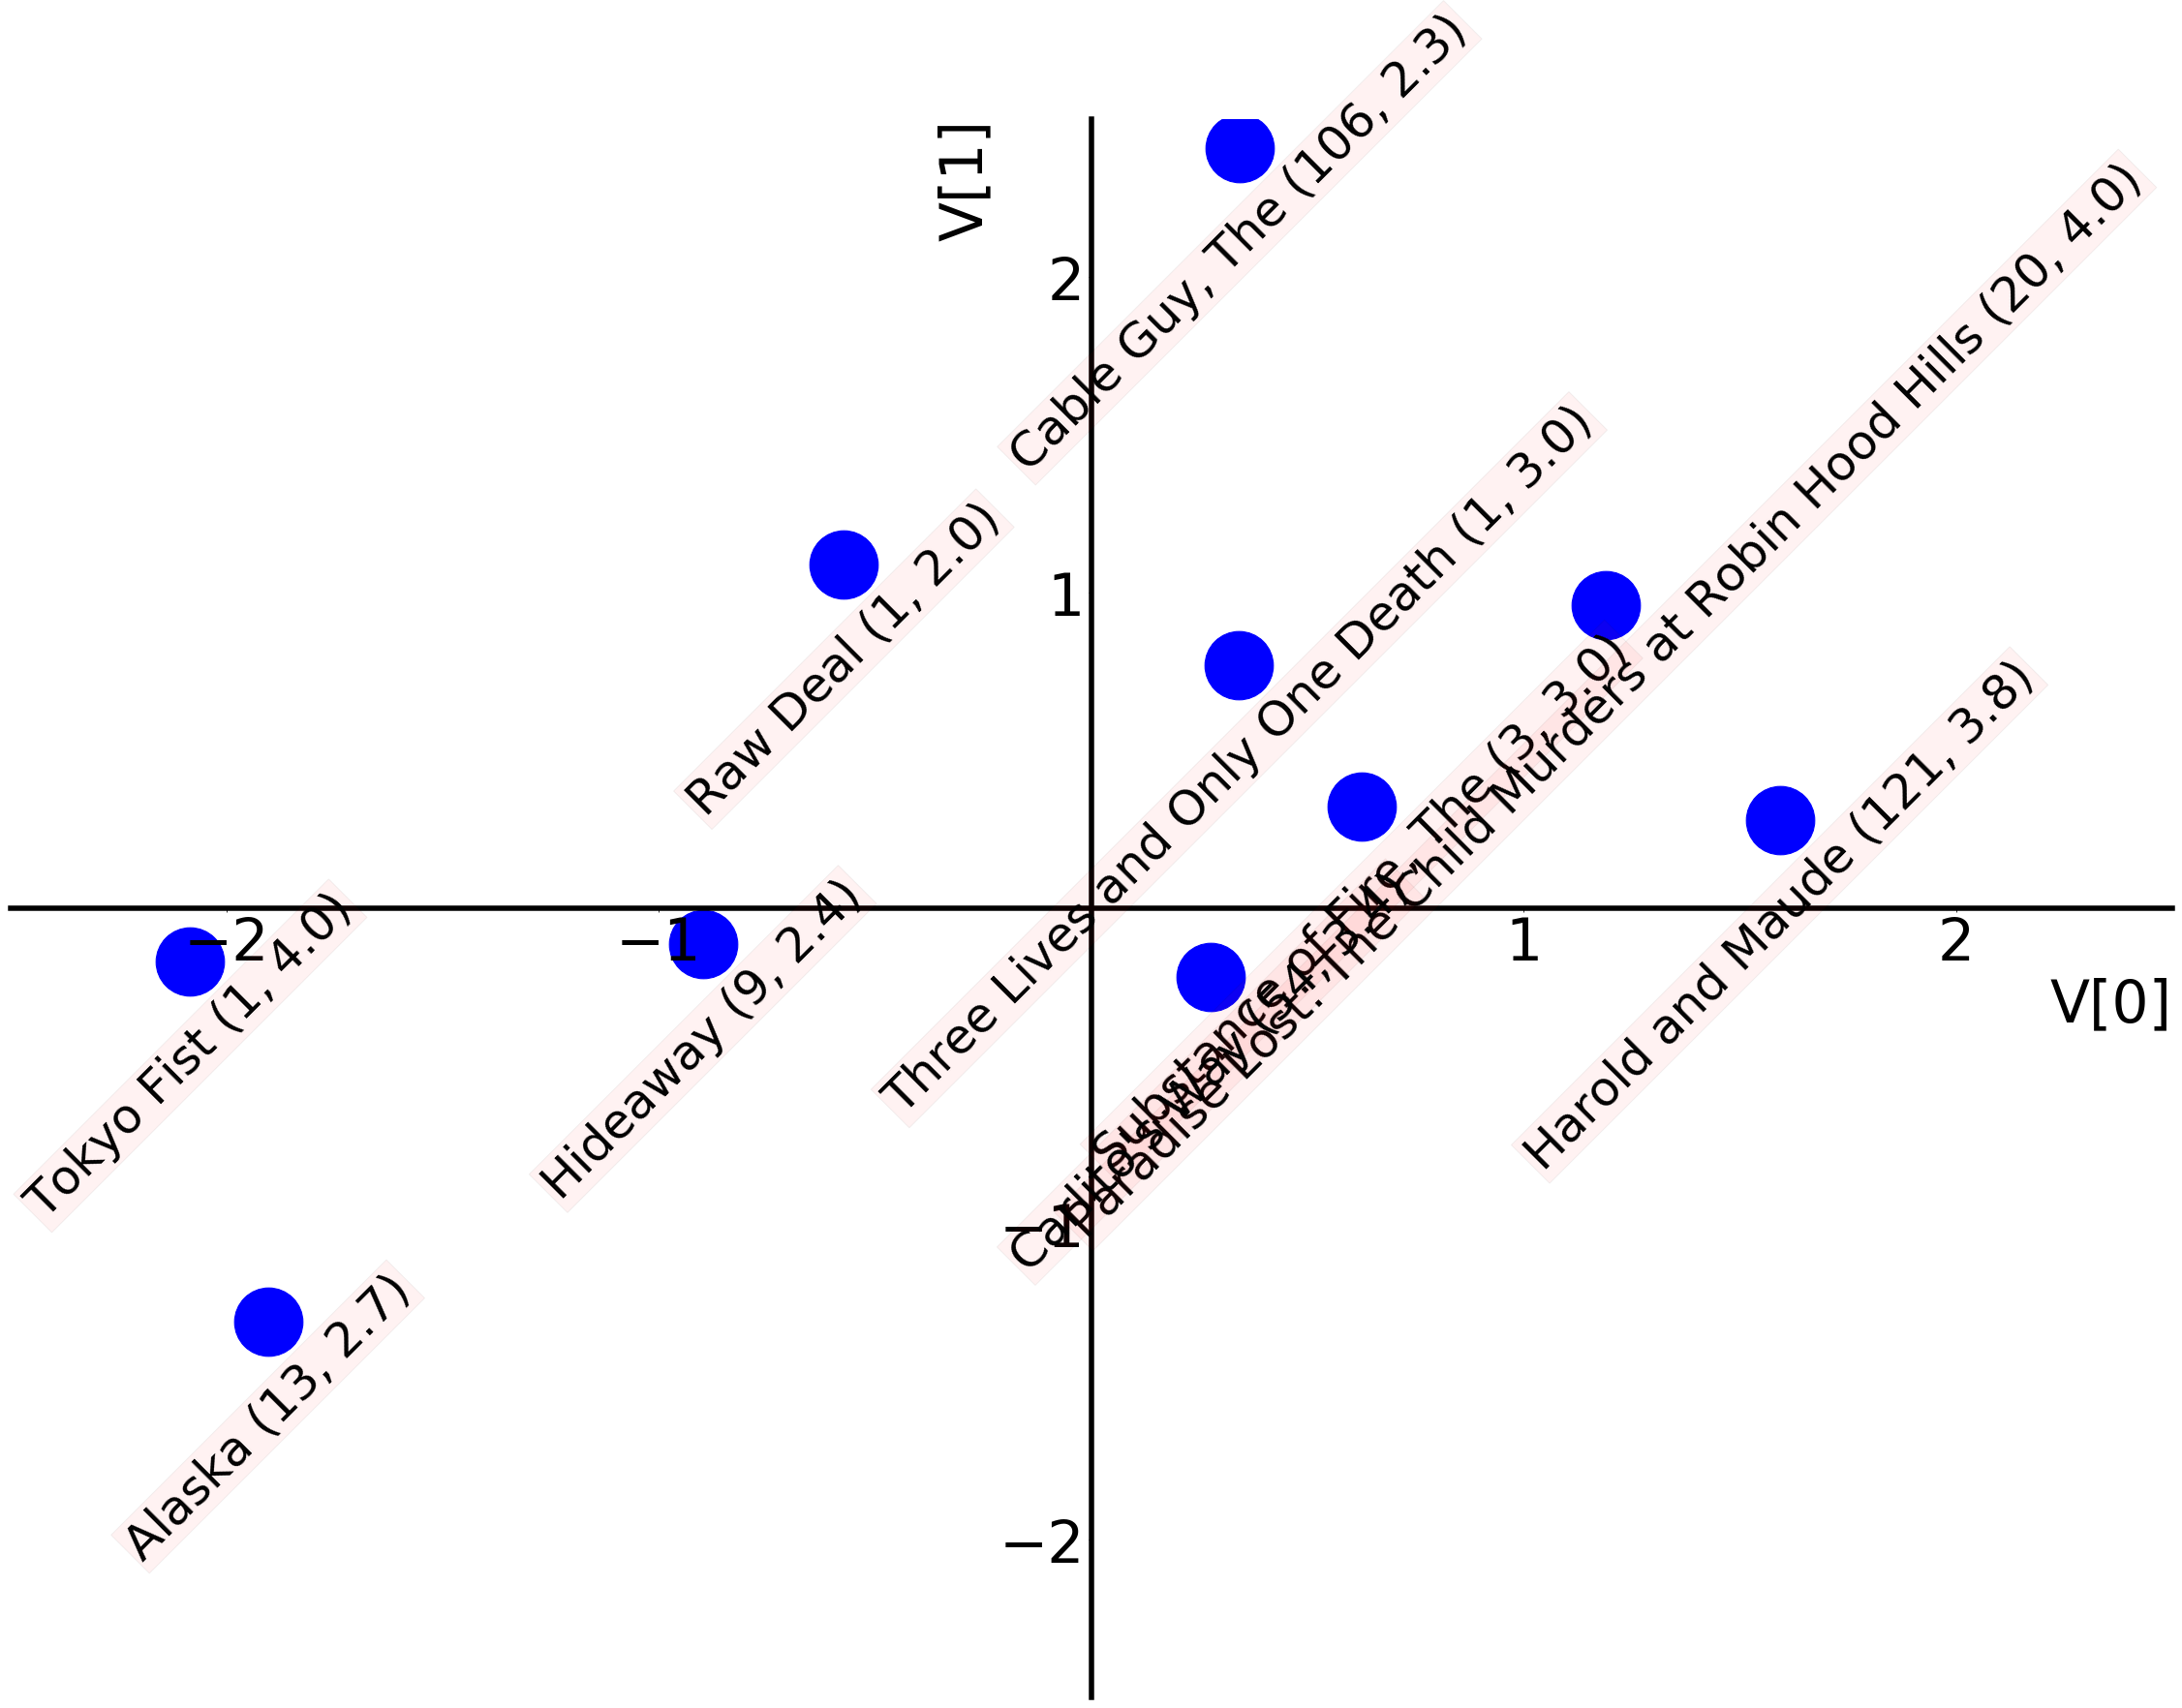

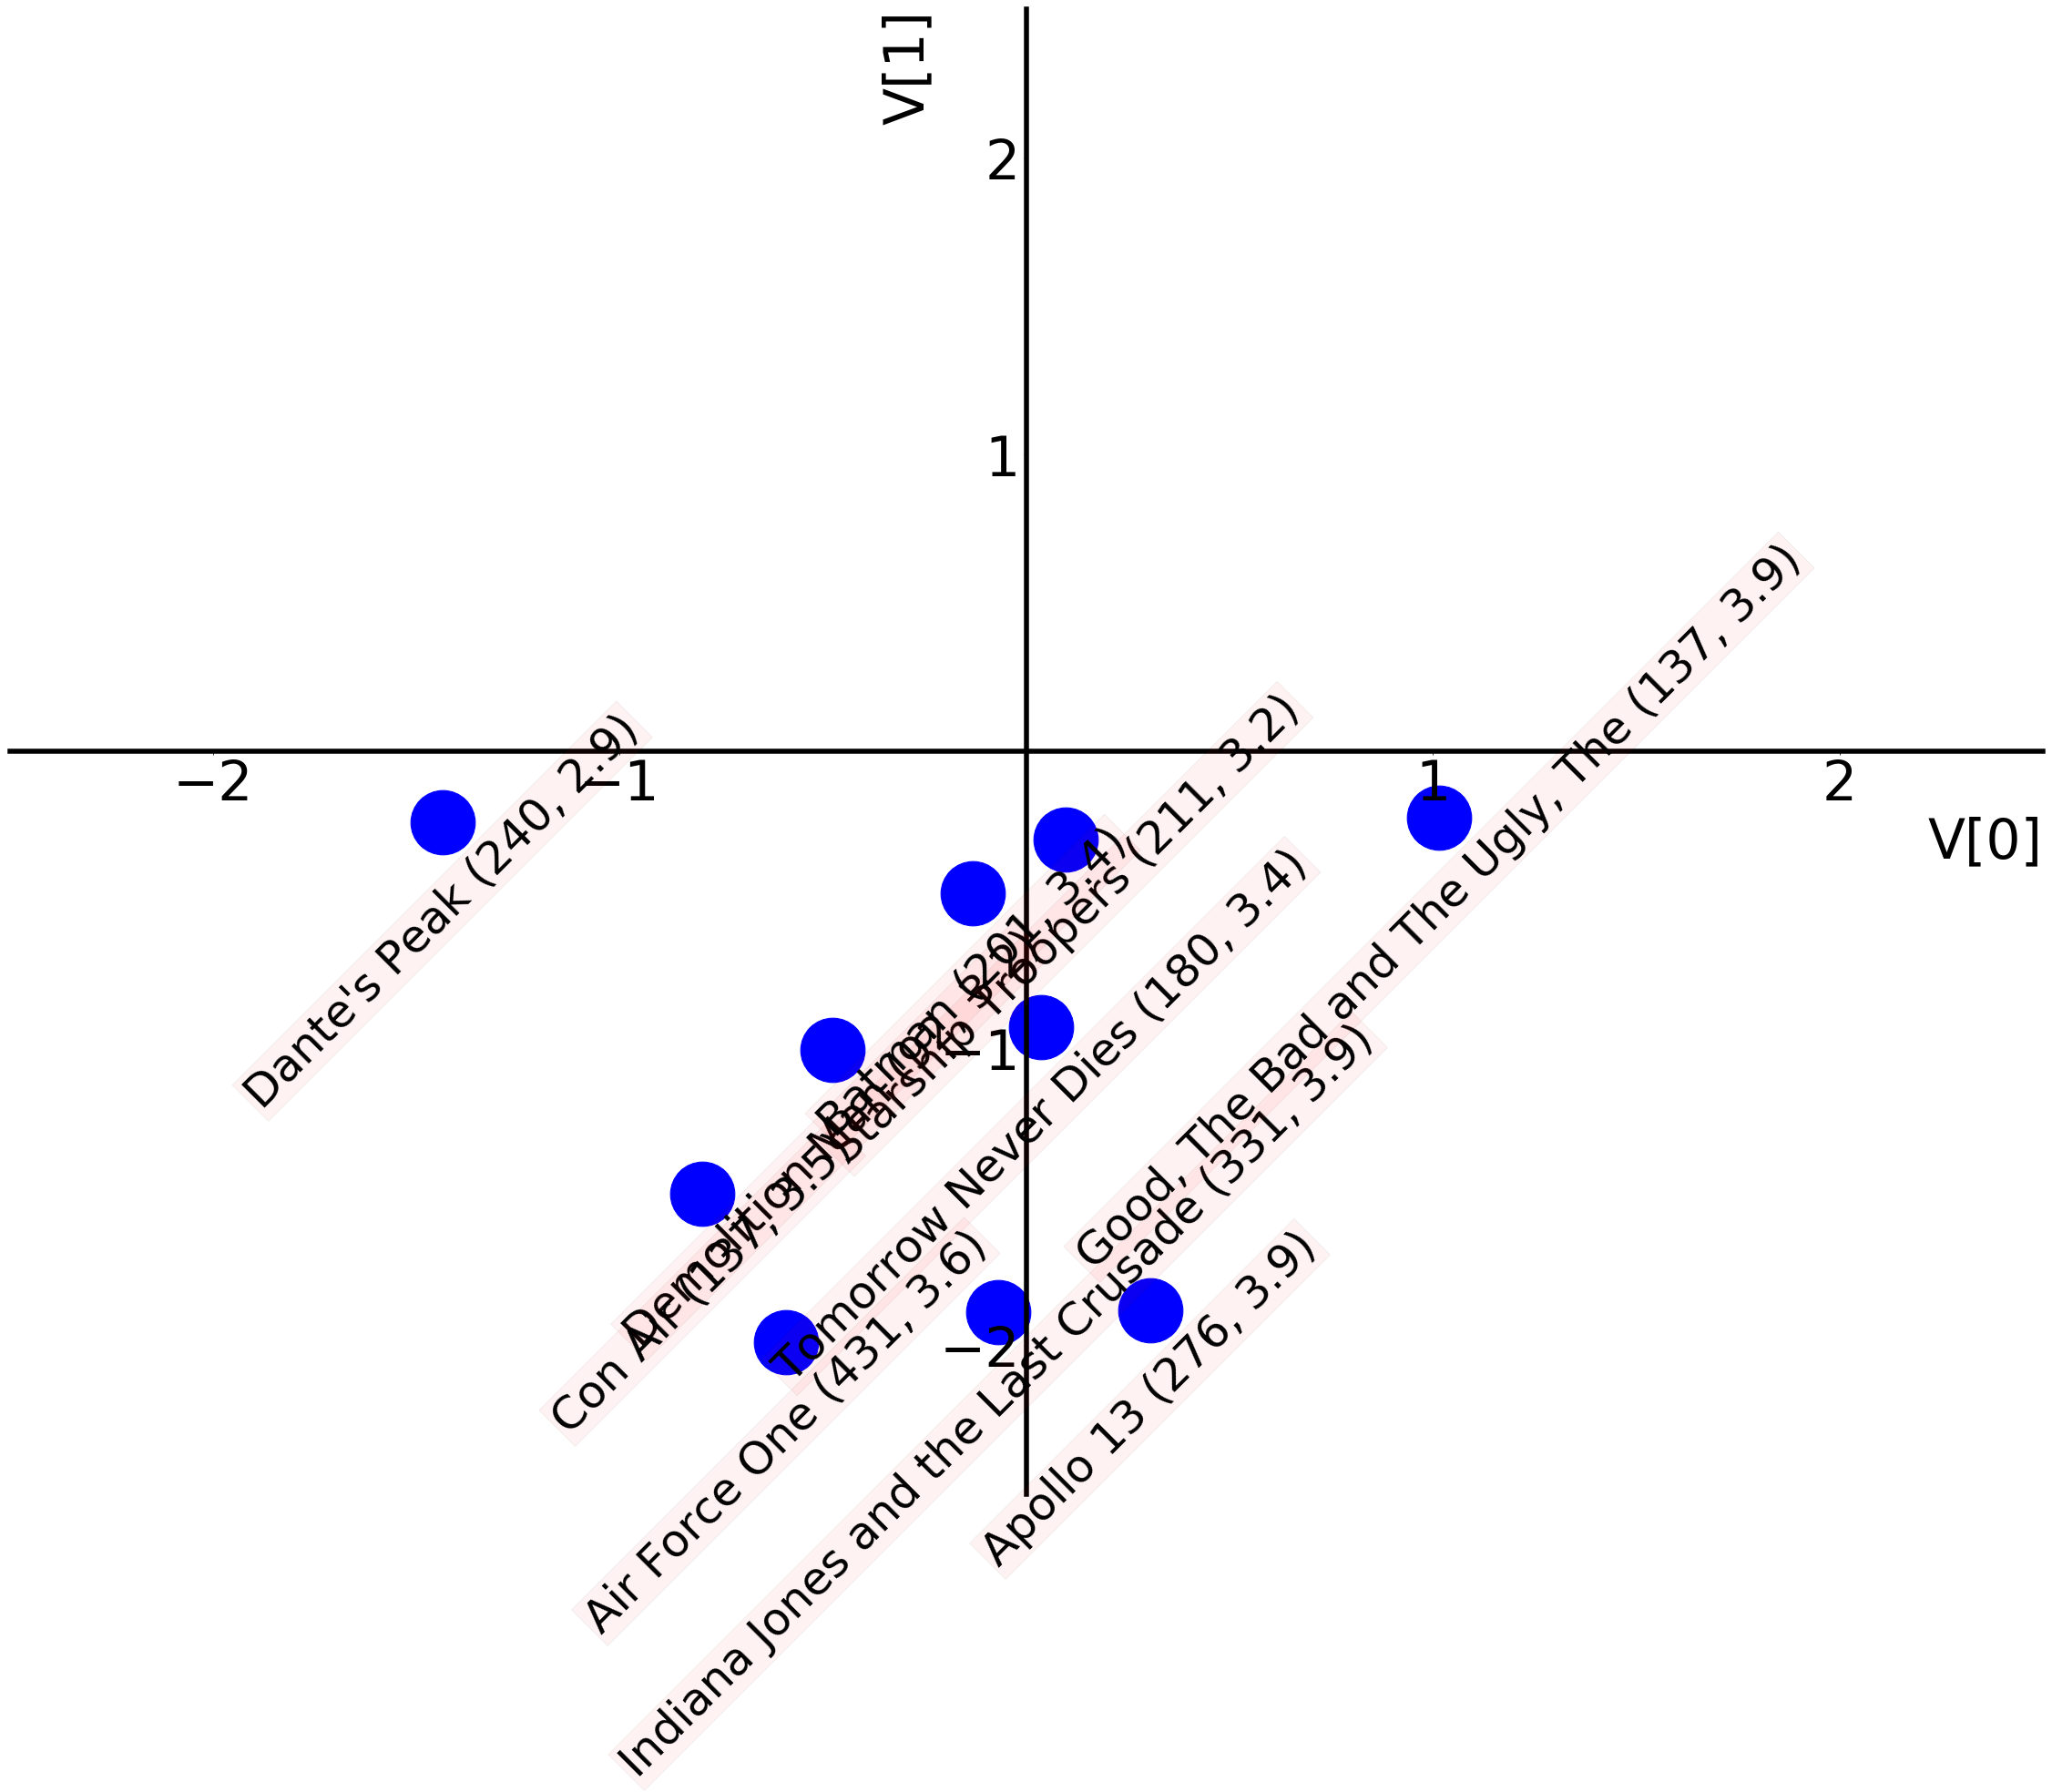

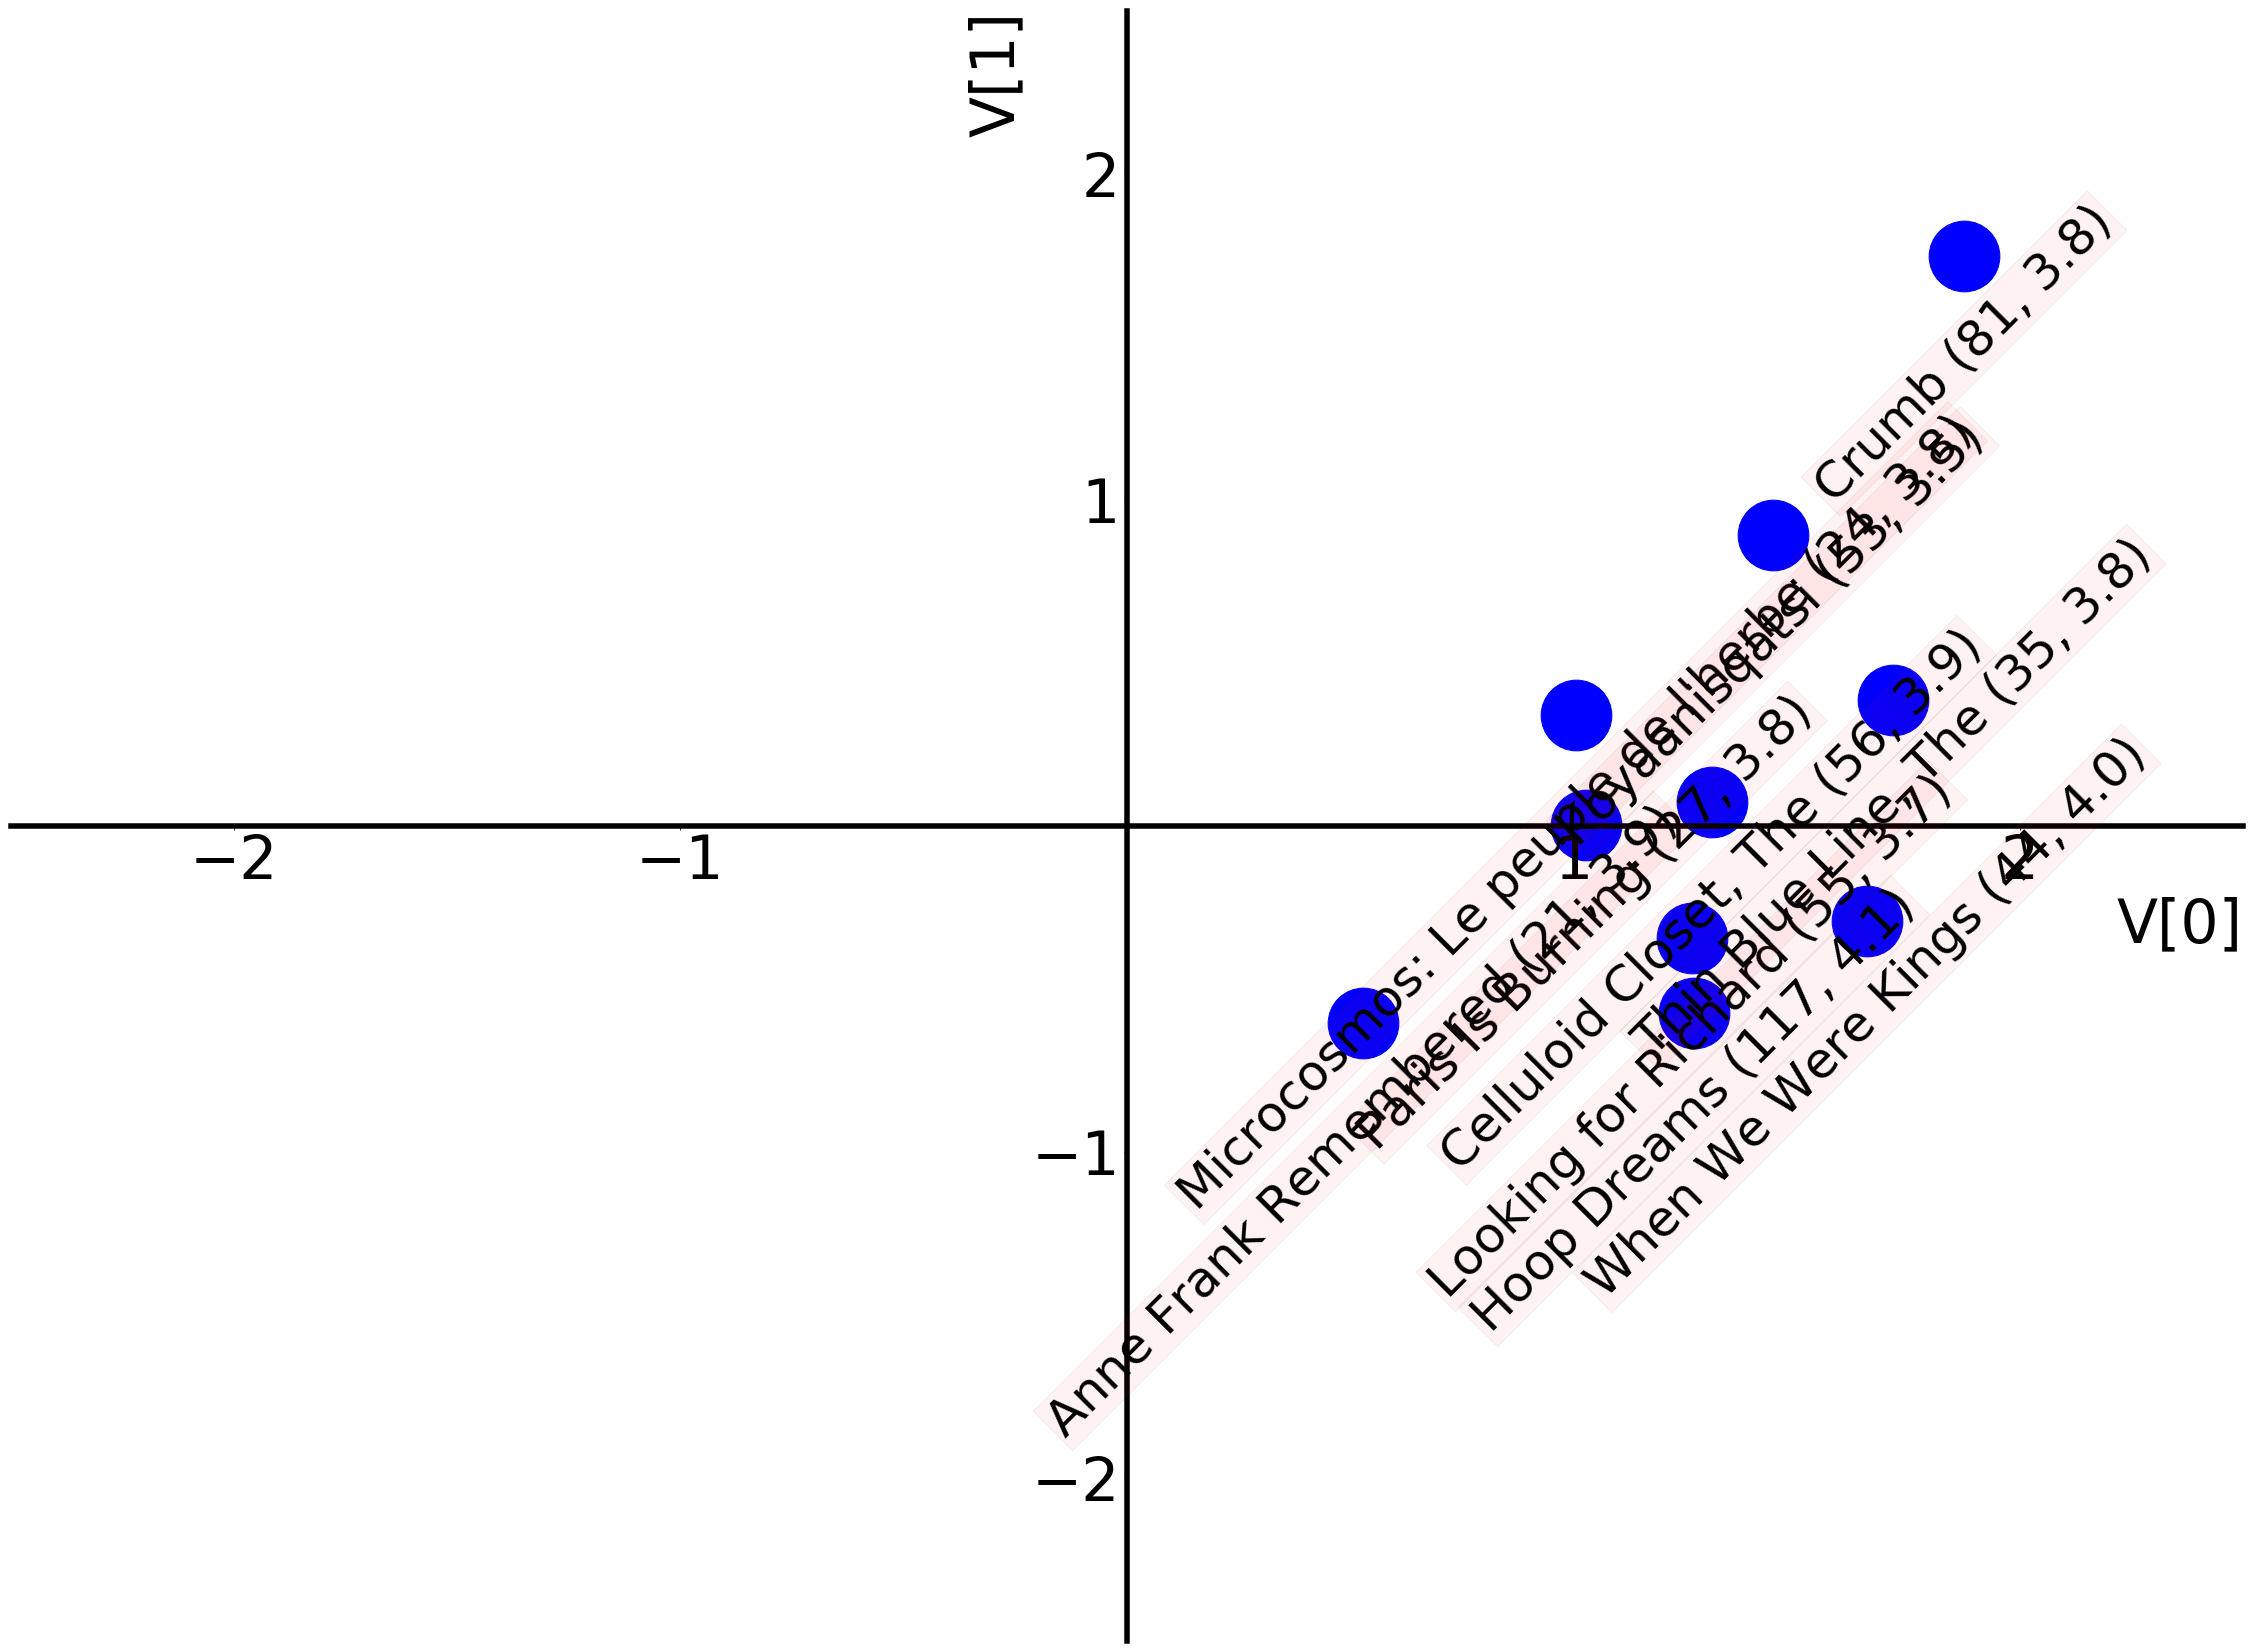

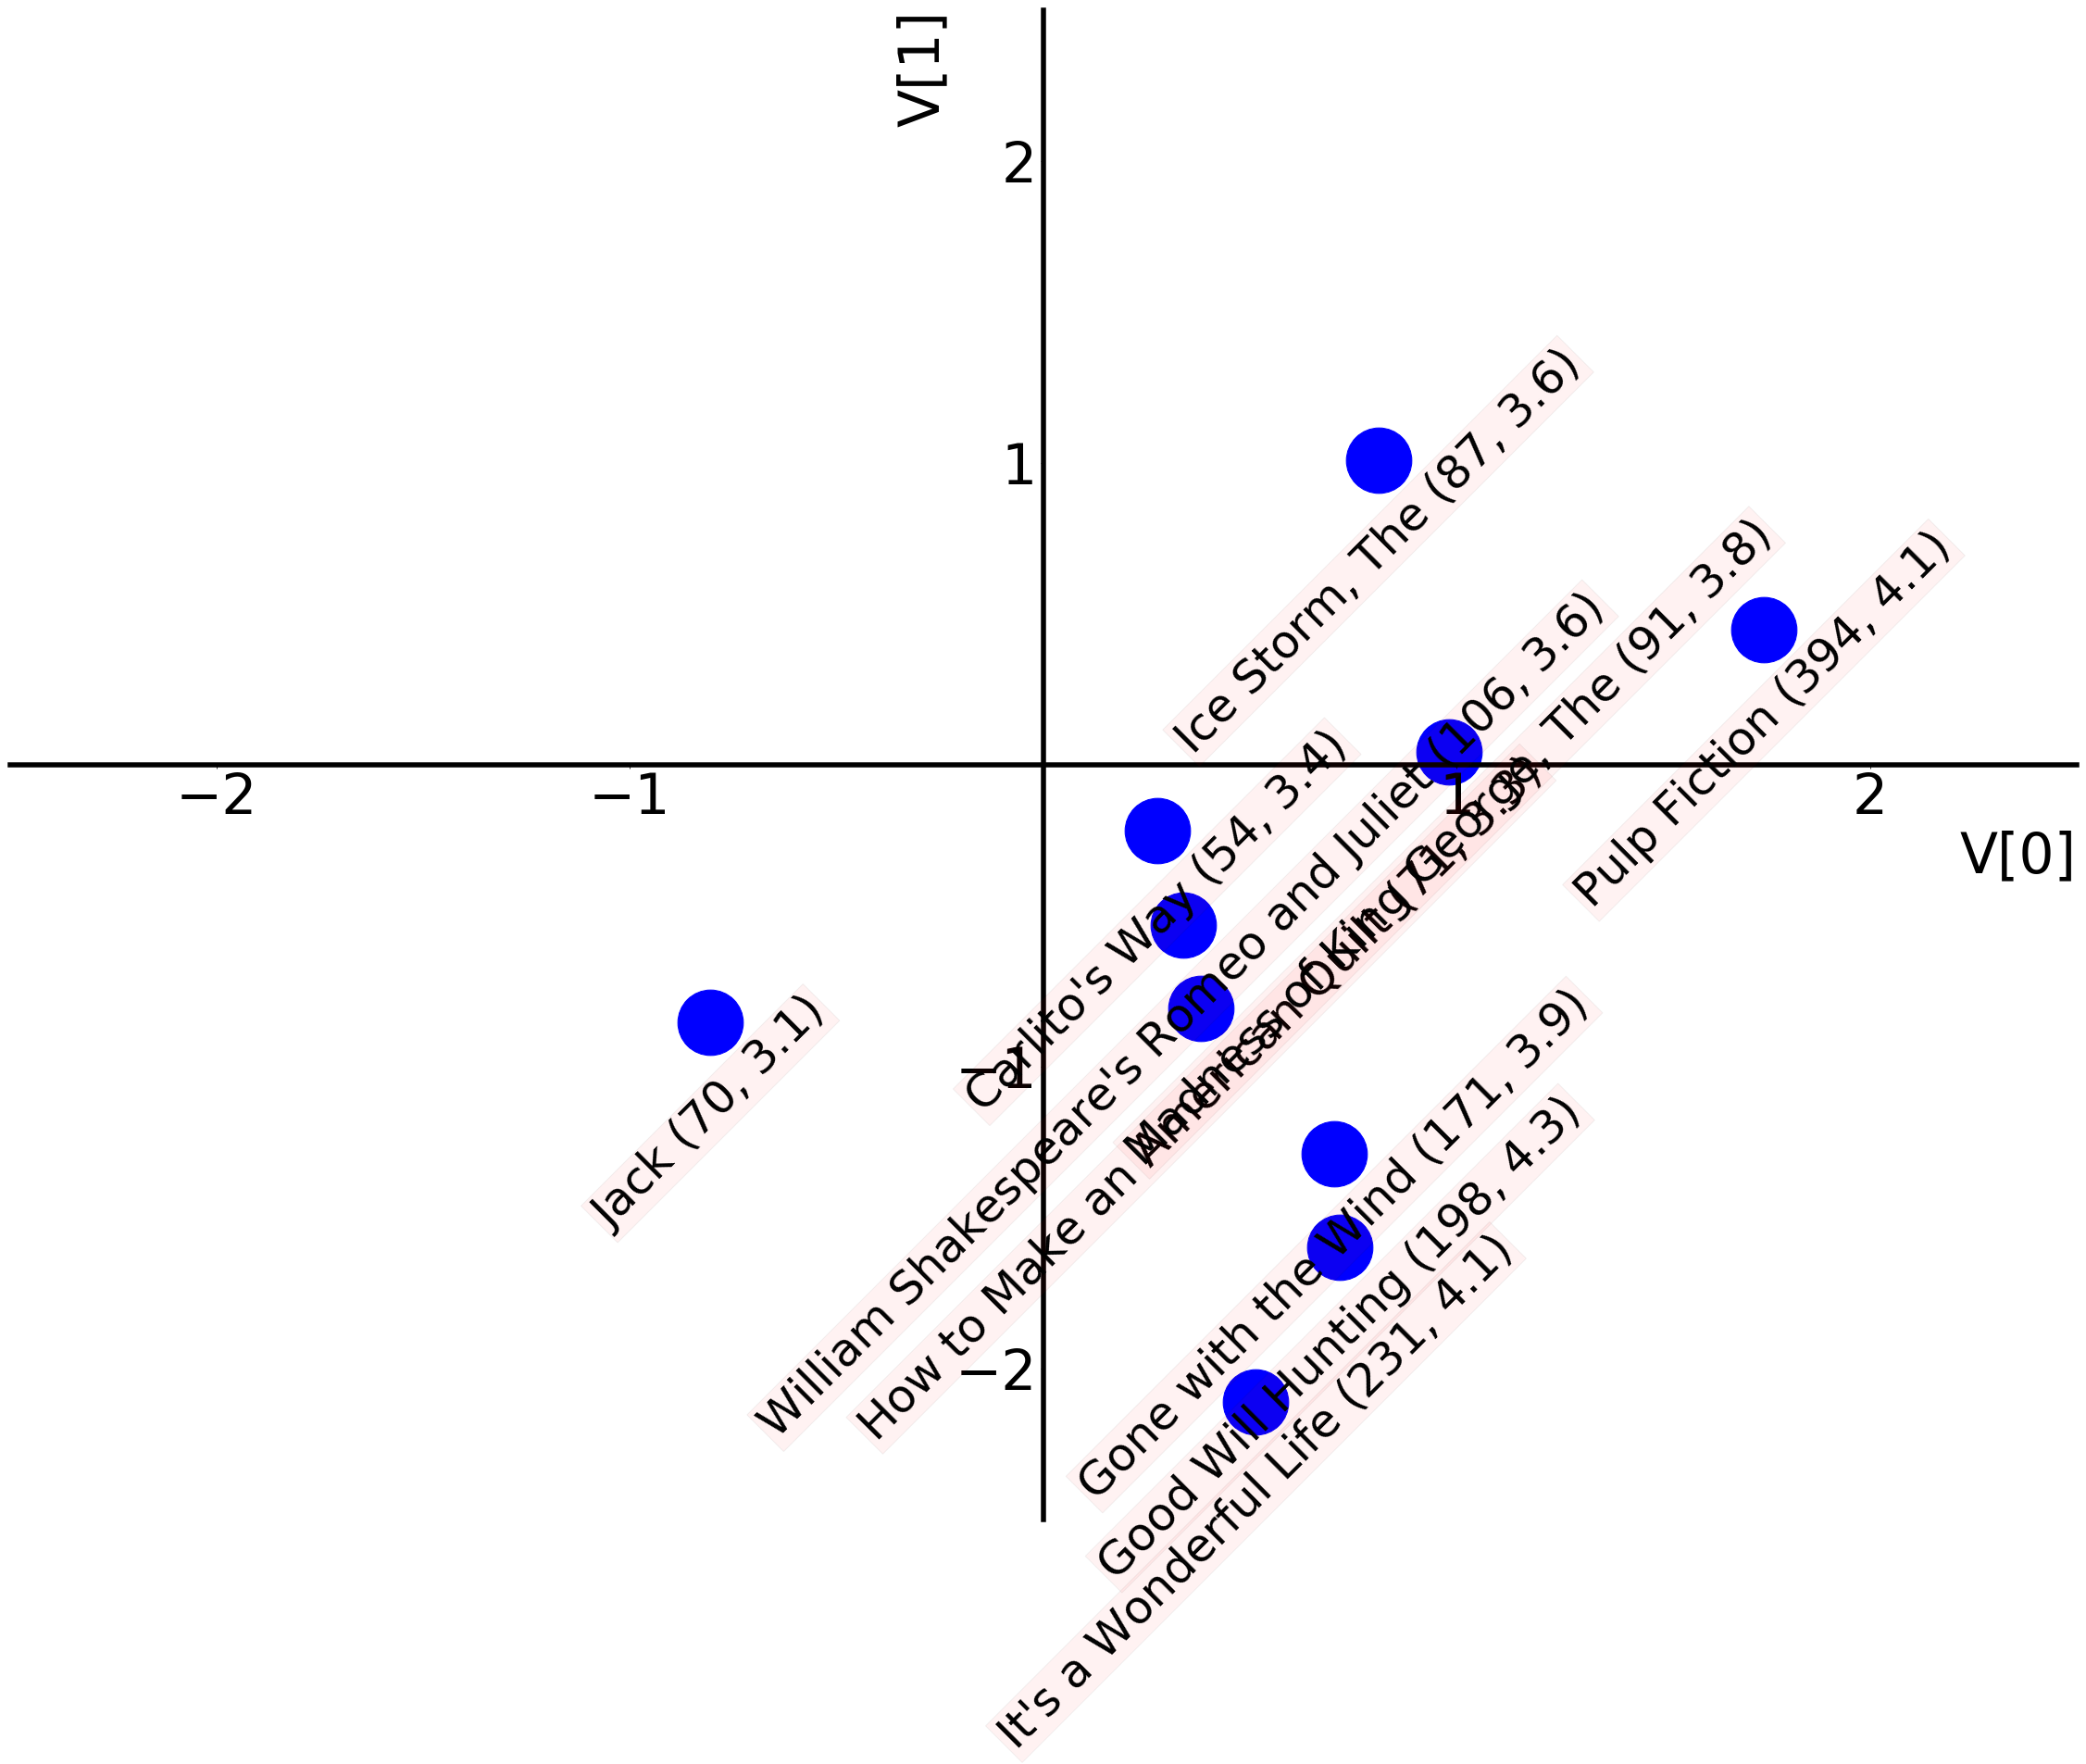

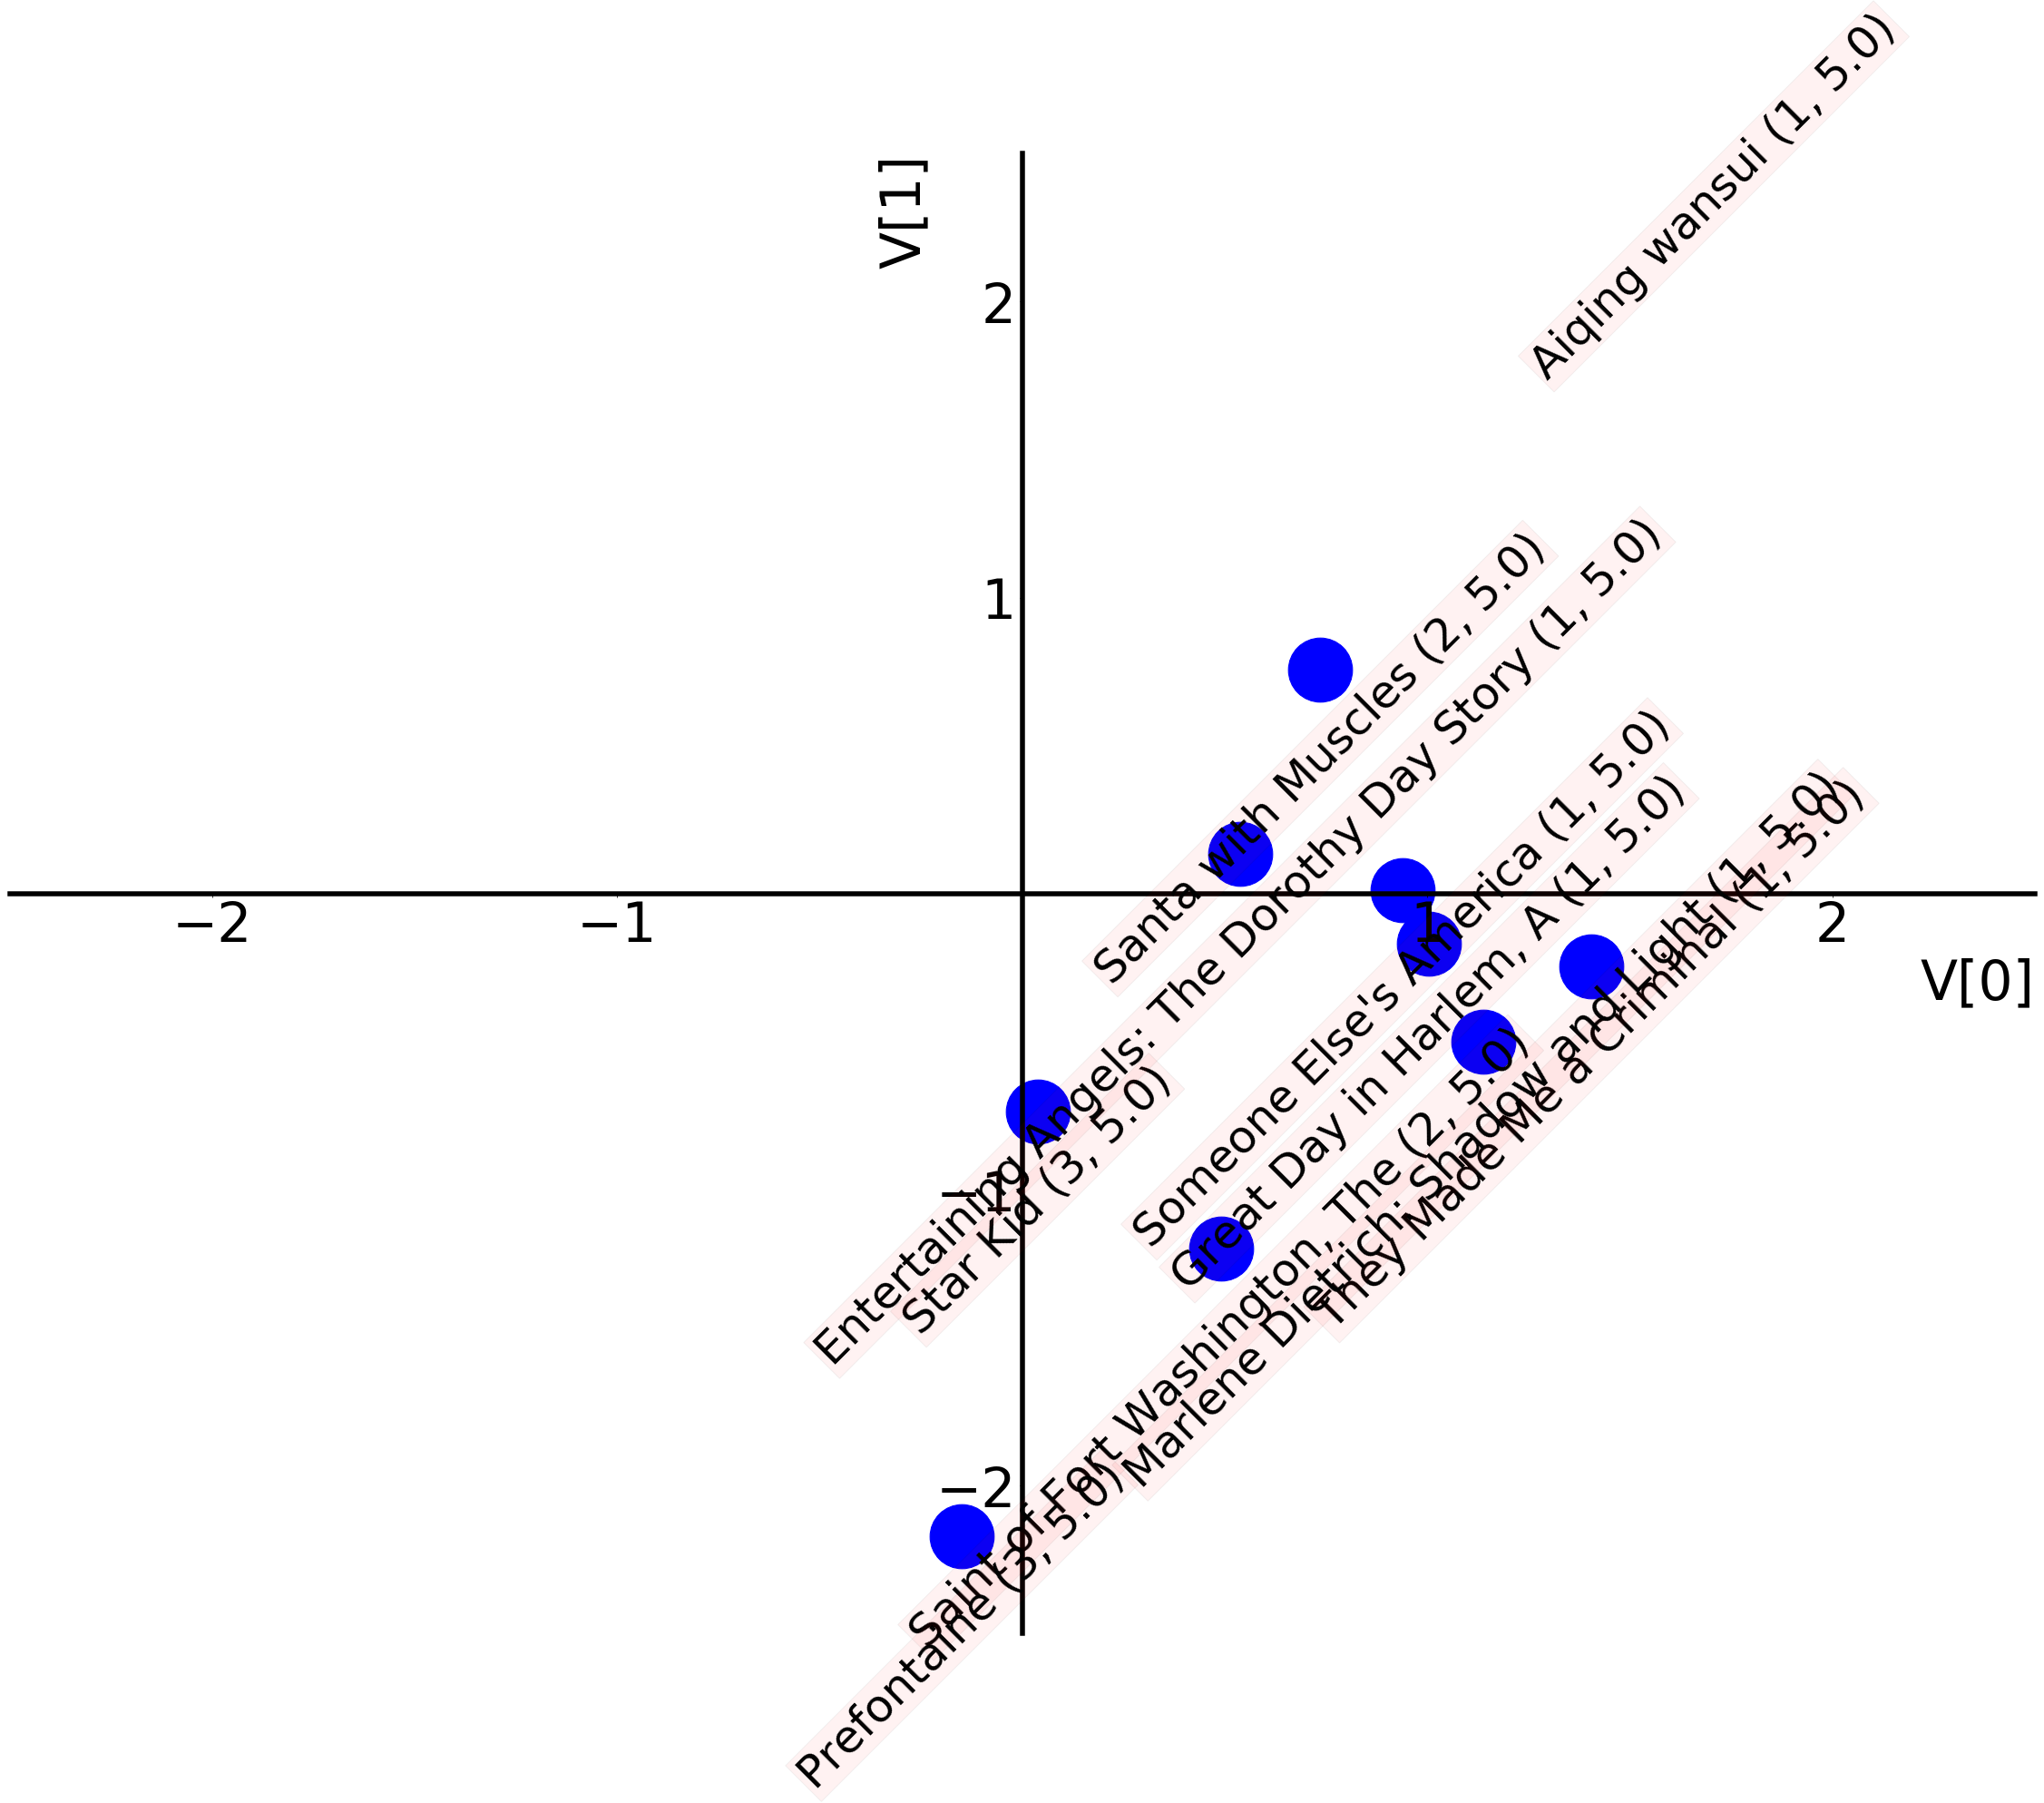

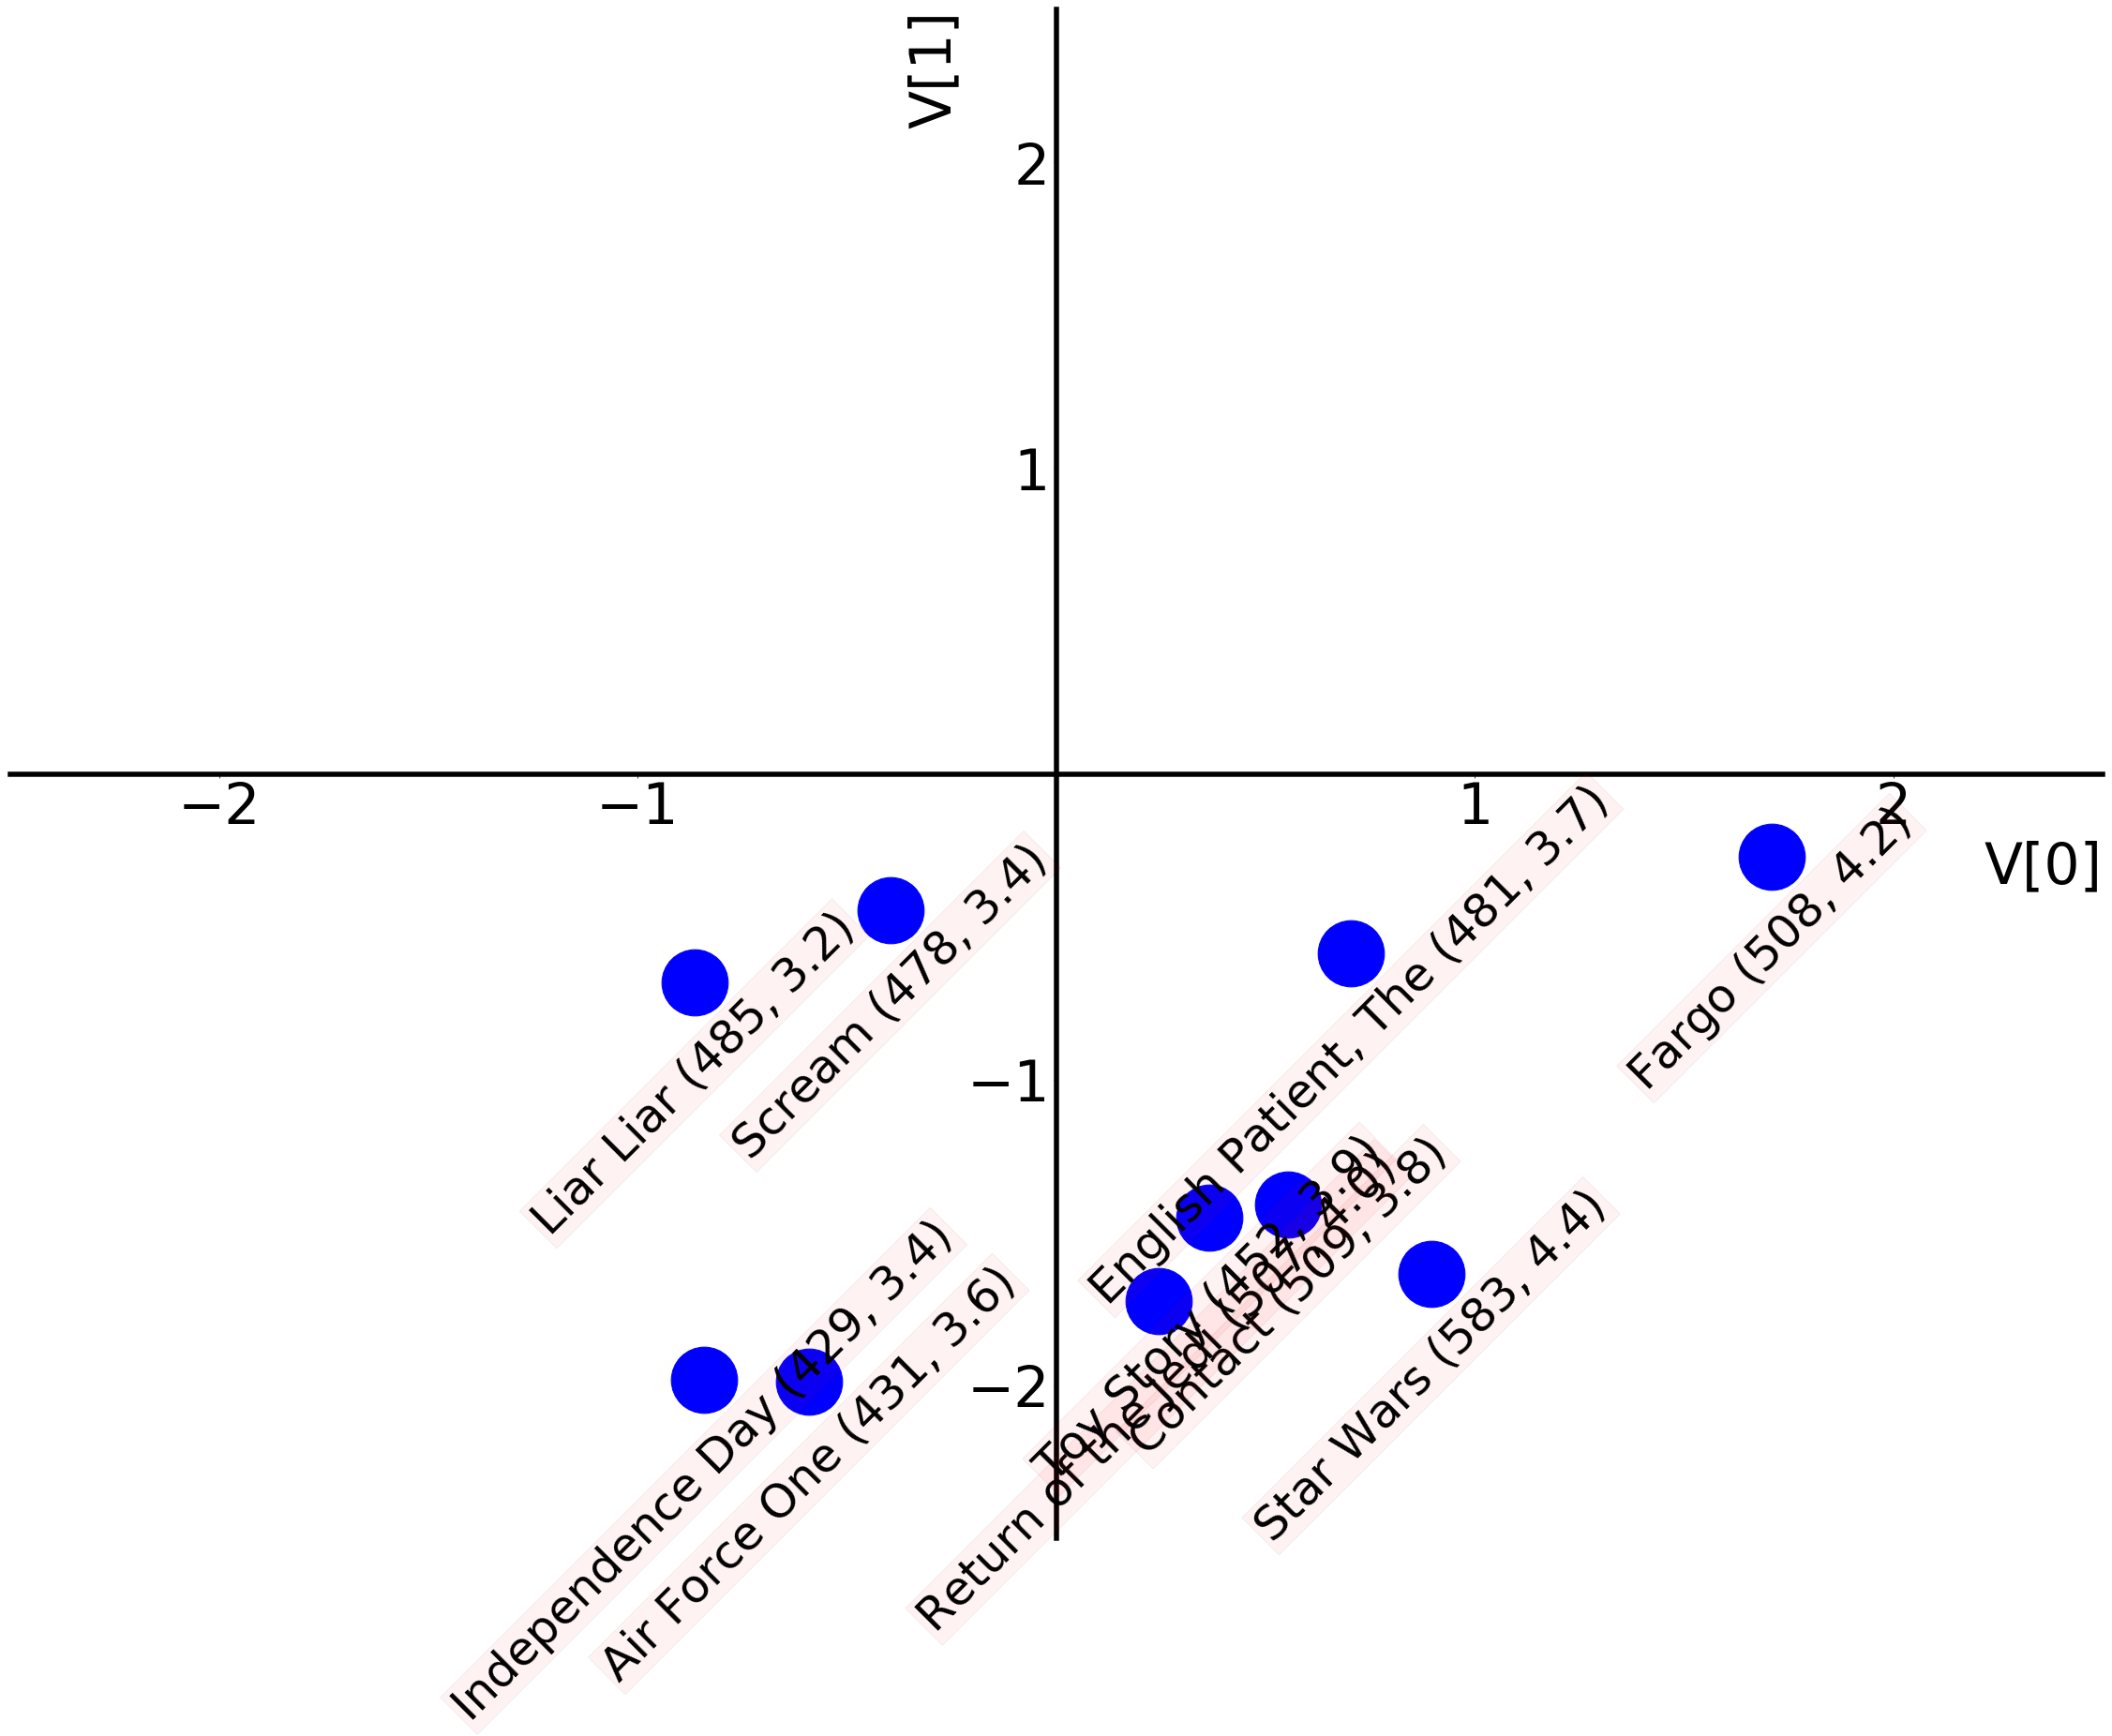

In [ ]:
## perform SVD to V and get the A, Sigma, B
U = UT.transpose()
V = VT.transpose()
Vp = np.zeros_like(V)
V_row_means = np.mean(V, axis=1)
for irow in range(len(V)):
    Vp[irow] = V[irow] - V_row_means[irow]
A, S, B =  np.linalg.svd(Vp)
A12 = A[:,[0,1]]
A12T = A12.transpose()
Vtilt = np.matmul(A12T, V)

## visualize the movies of choices
visualize_V(Vtilt, id_random10, name_random10, 'visualize_V_random10movies')
visualize_V(Vtilt, id_random10_action, name_random10_action, 'visualize_V_random10movies_action')
visualize_V(Vtilt, id_random10_documentary, name_random10_documentary, 'visualize_V_random10movies_documentary')
visualize_V(Vtilt, id_random10_drama, name_random10_drama, 'visualize_V_random10movies_drama')
visualize_V(Vtilt, id_best_10, name_best_10, 'visualize_V_best10movies')
visualize_V(Vtilt, id_most_popular_10, name_most_popular_10, 'visualize_V_mostpopular10movies')

## Task 2: add bias term

In [ ]:
## train with the optimized eta dna lambda, and get U, V
reg = 0.10
eta = 0.03
K = 20
UT_bias, VT_bias, a_bias, b_bias, e_in = train_model_bias(M, N, K, eta, reg, Y_train, 1e-5, 300, True)
eout = get_err_bias(UT_bias, VT_bias, Y_test, a_bias, b_bias)

Initial error = 7.029139262916016
After epoch: 0, error = 0.5467111683061308, eps = 0.9222221743150769
After epoch: 1, error = 0.45816305492231896, eps = 0.013659713936115887
After epoch: 2, error = 0.4231570253291866, eps = 0.005400141595437018
After epoch: 3, error = 0.4146134746773347, eps = 0.0013179553289539444
After epoch: 4, error = 0.3925553426533074, eps = 0.0034027576861775915
After epoch: 5, error = 0.37958388682578637, eps = 0.0020010180812197105
After epoch: 6, error = 0.37267312952473286, eps = 0.0010660754273232548
After epoch: 7, error = 0.36655935081580426, eps = 0.0009431309718671898
After epoch: 8, error = 0.36114728889437087, eps = 0.0008348819057373744
After epoch: 9, error = 0.3570610478671692, eps = 0.000630356552755189
After epoch: 10, error = 0.35044413210440917, eps = 0.0010207464959406127
After epoch: 11, error = 0.3403217091932759, eps = 0.001561517191305215
After epoch: 12, error = 0.3386224918026611, eps = 0.0002621266855281807
After epoch: 13, error = 0.3

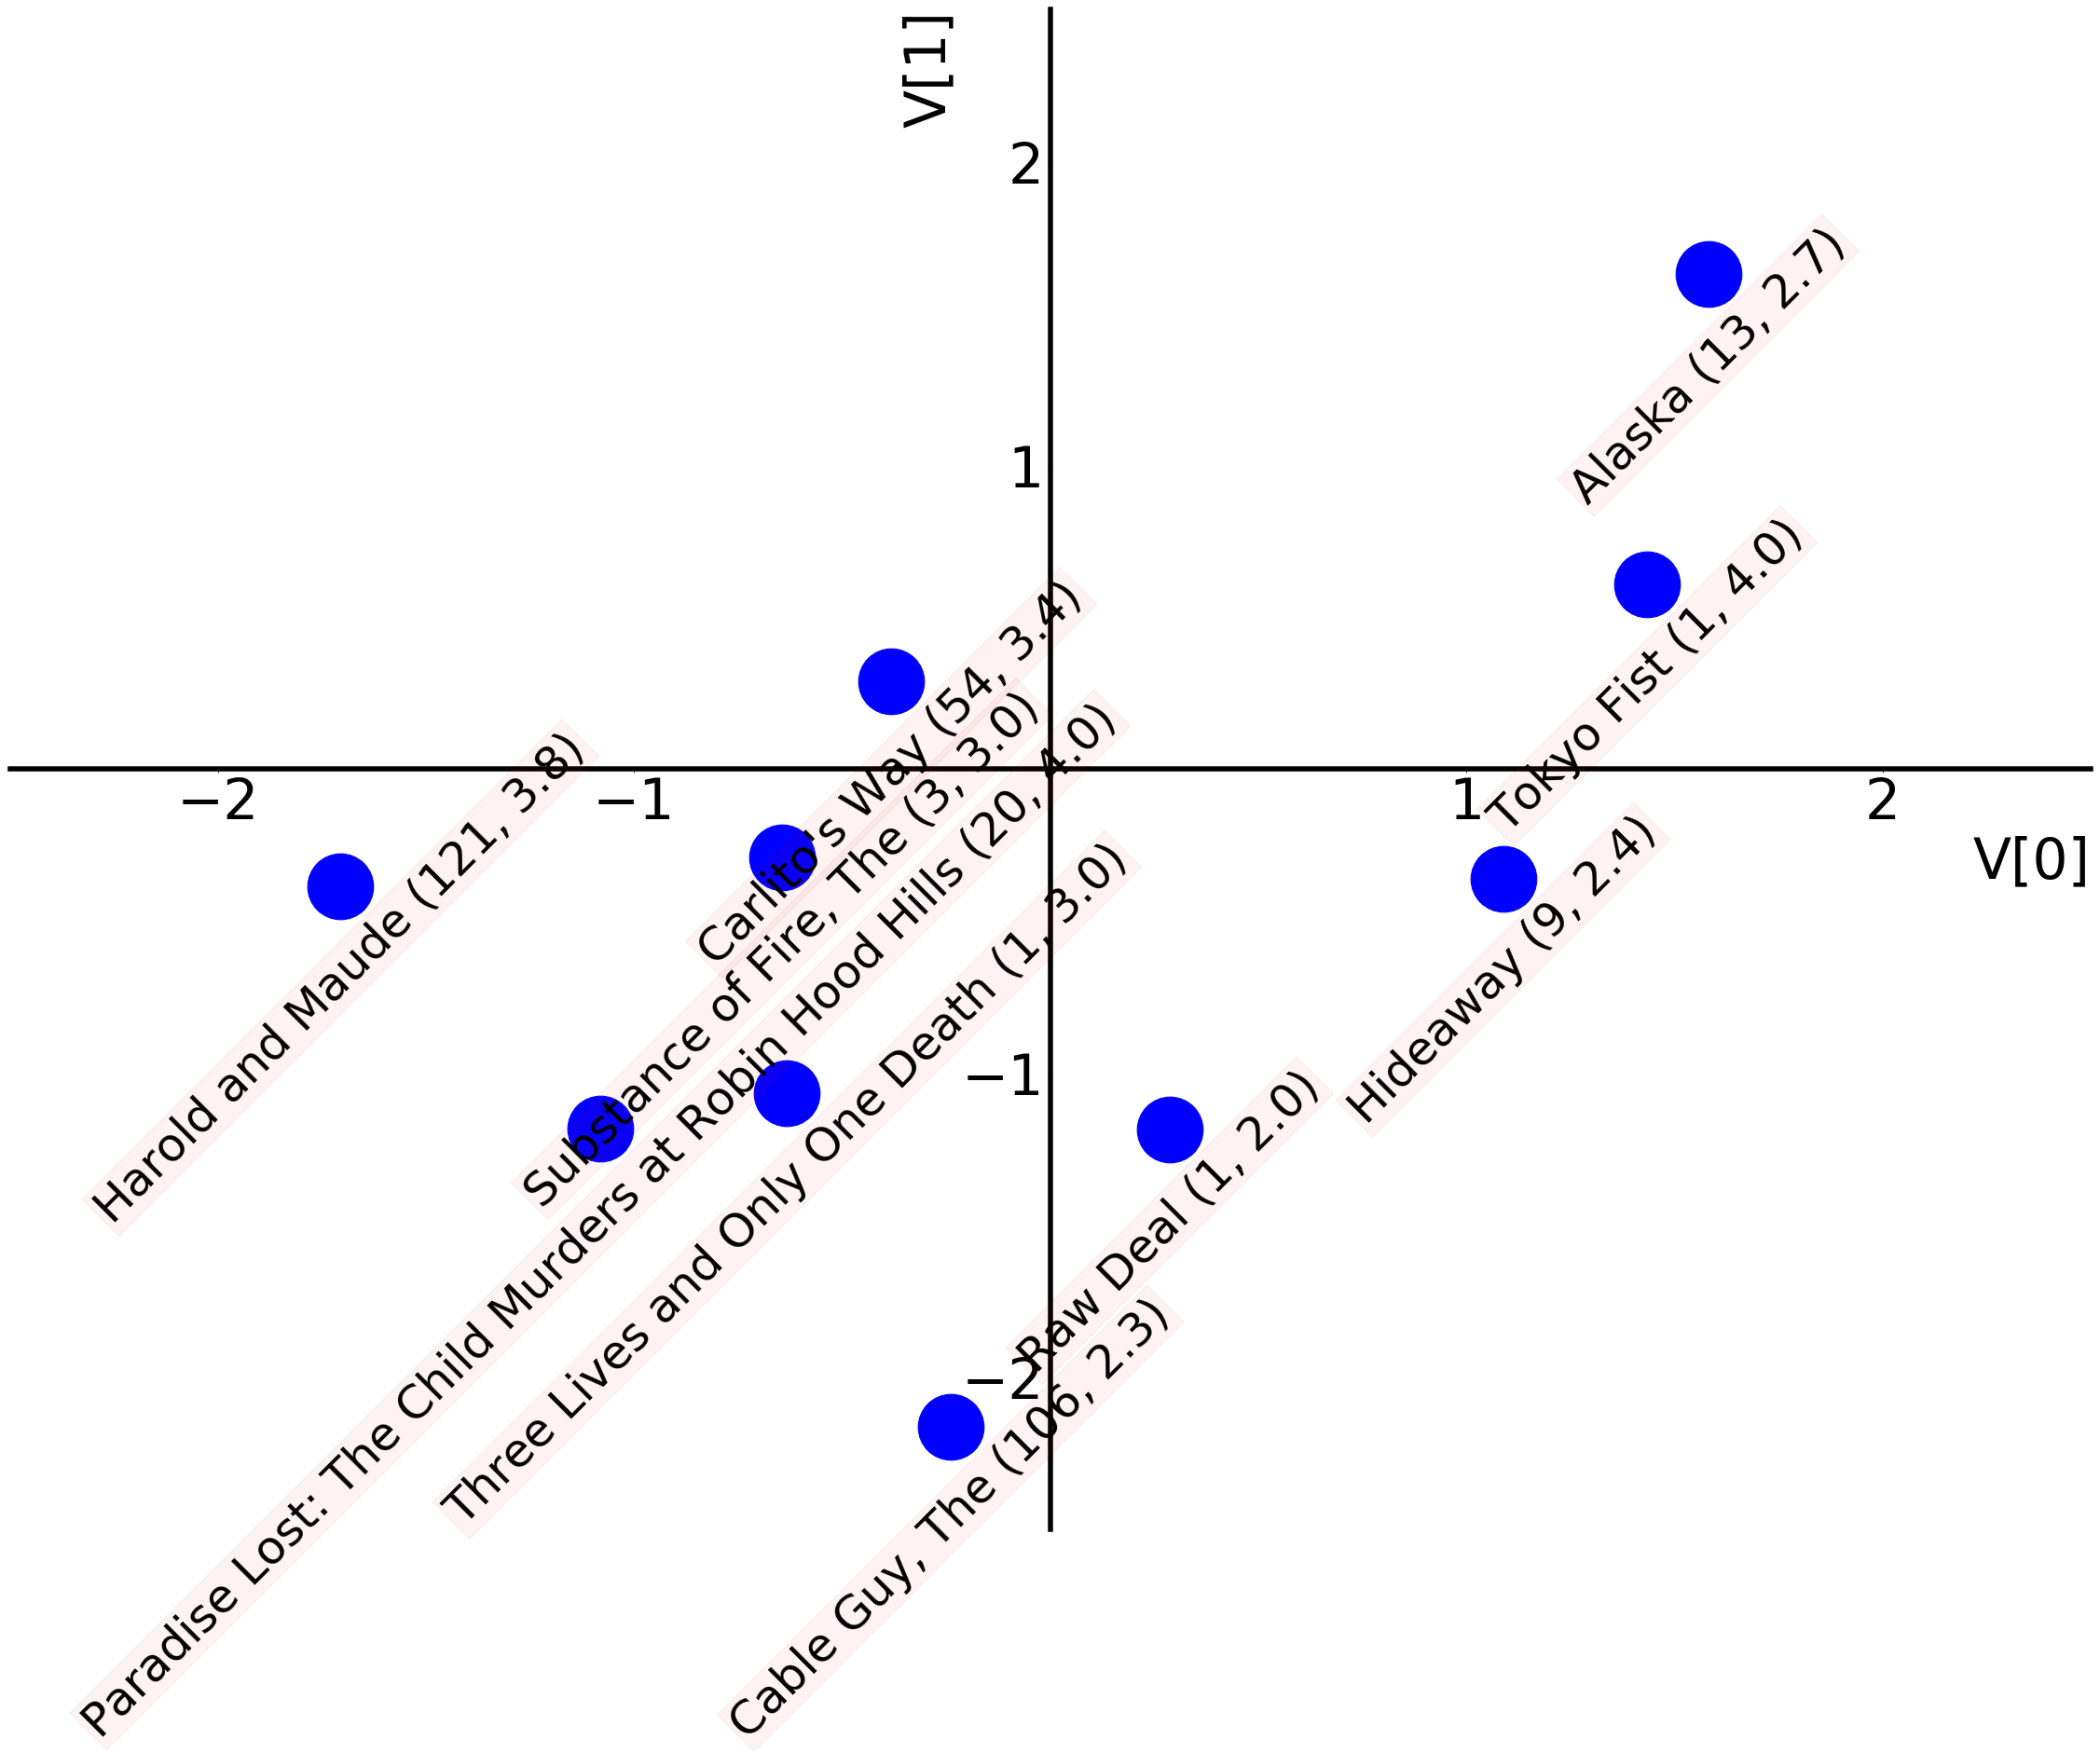

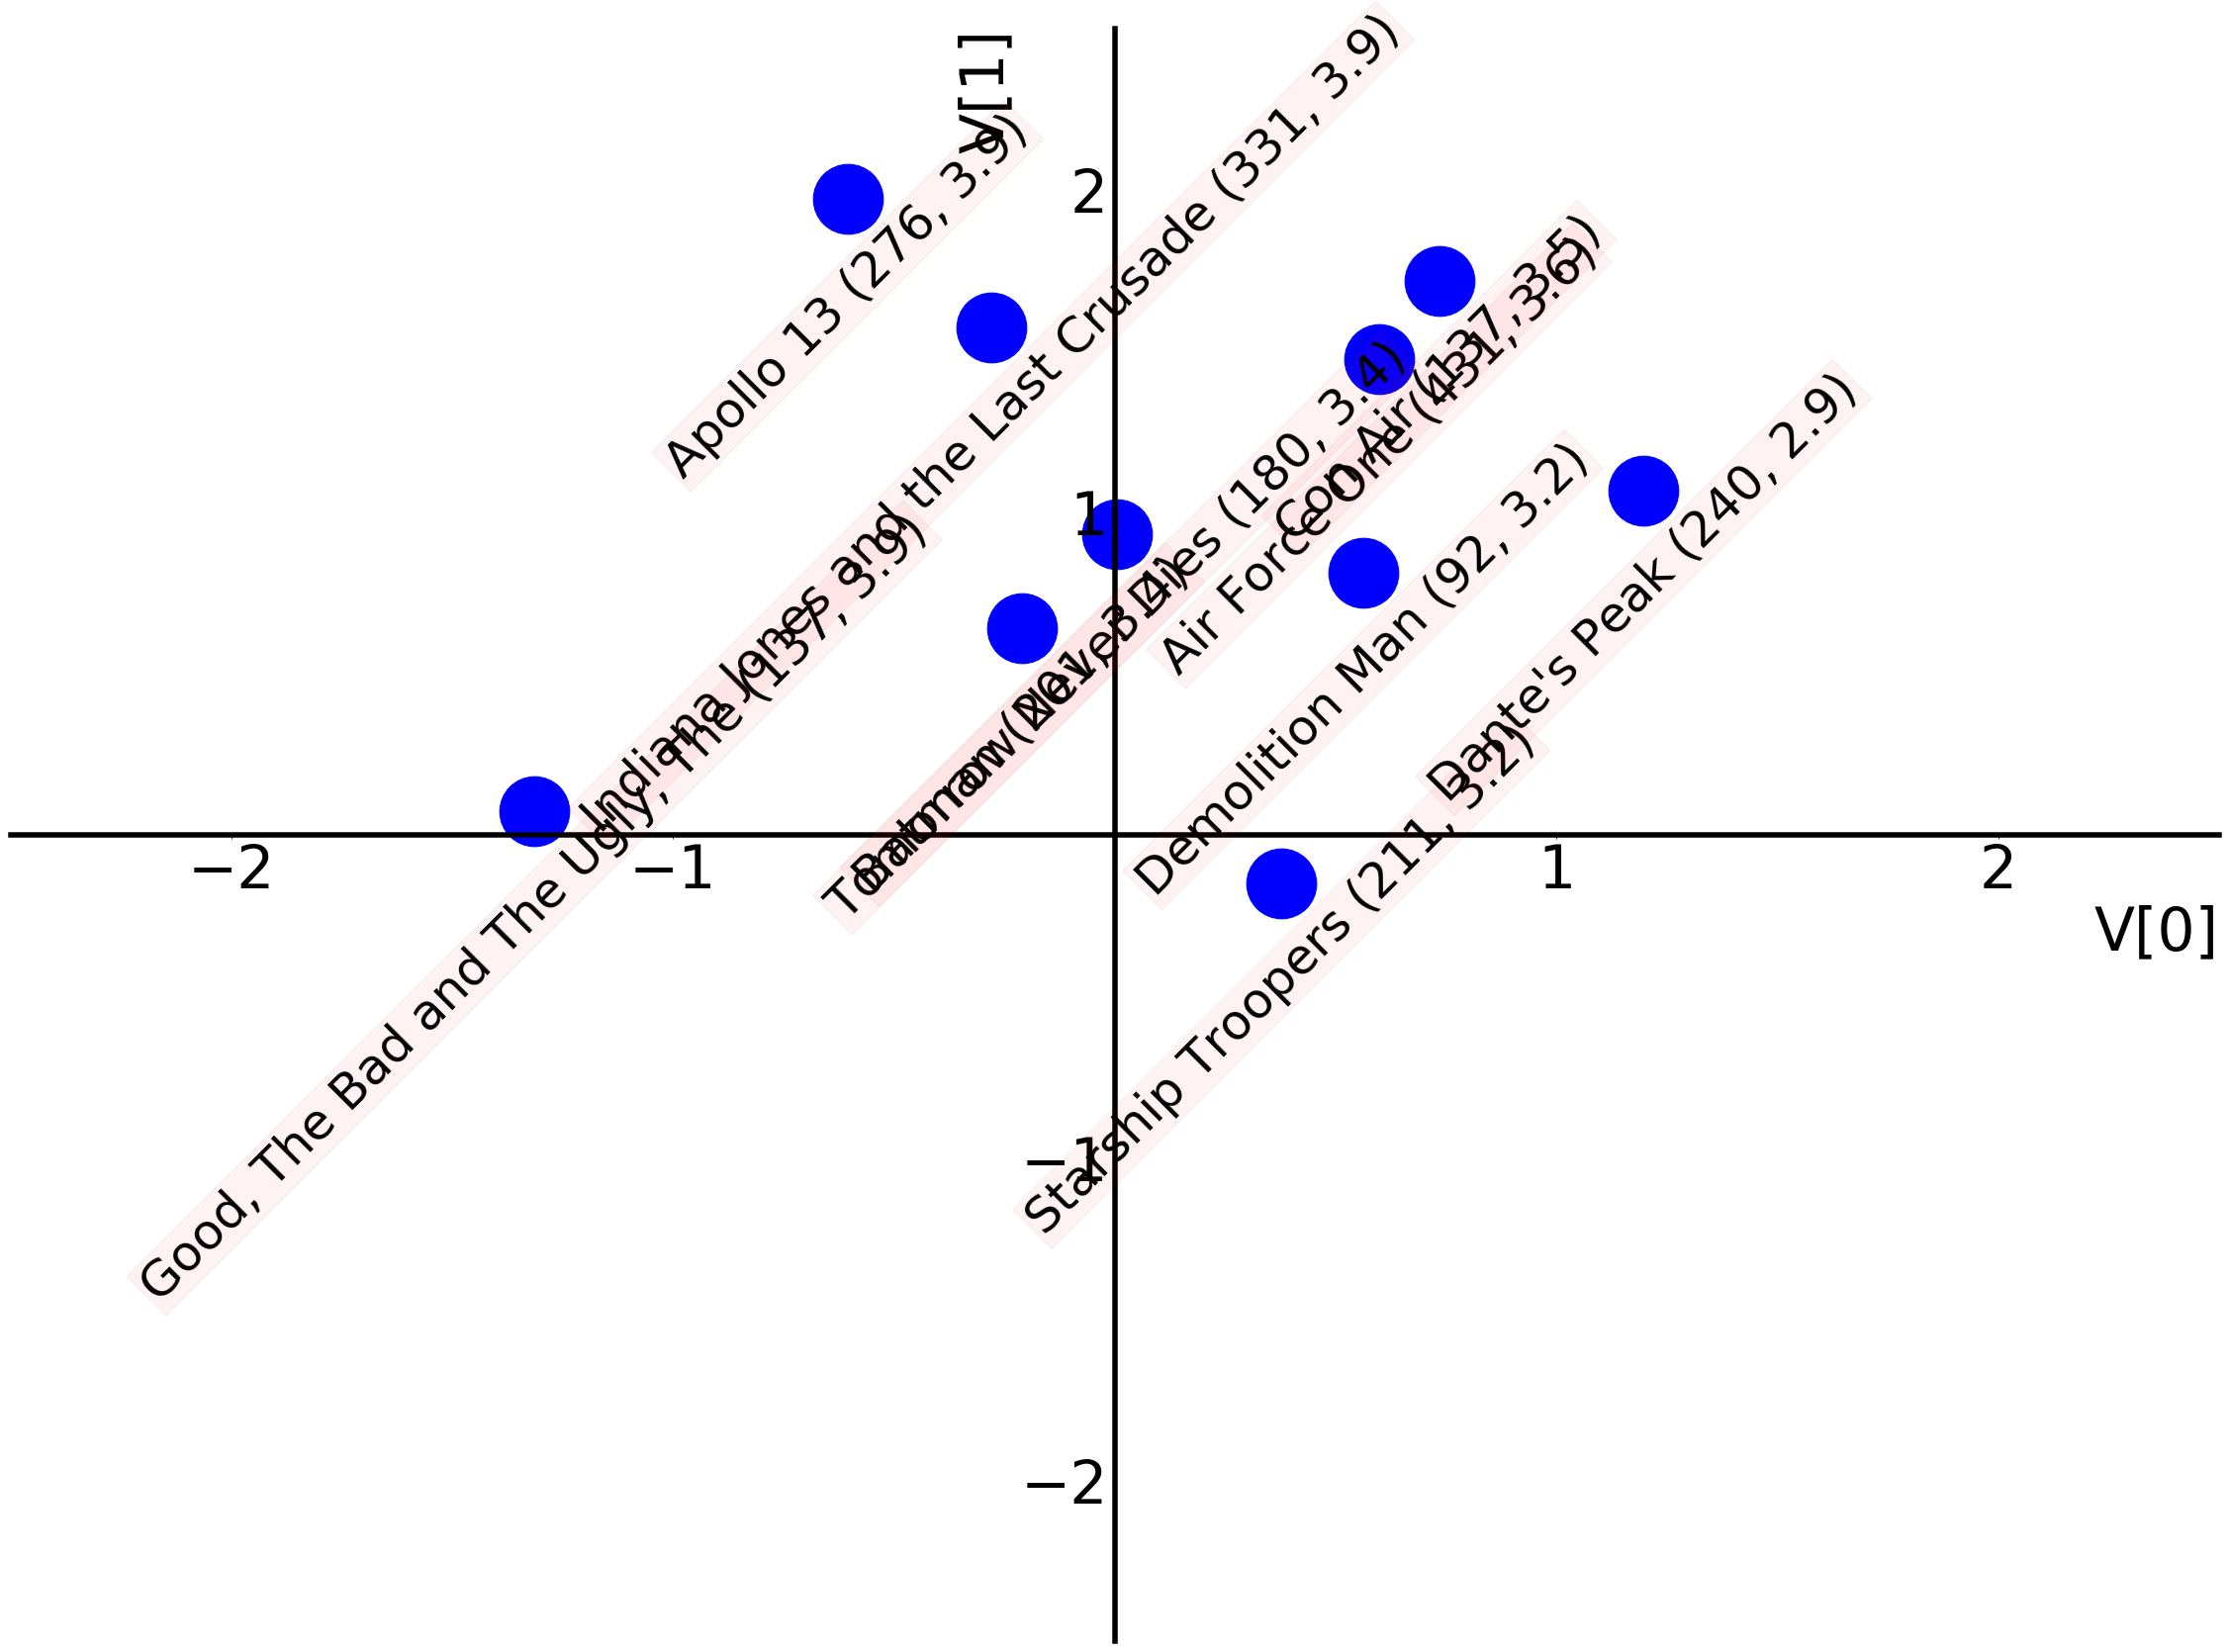

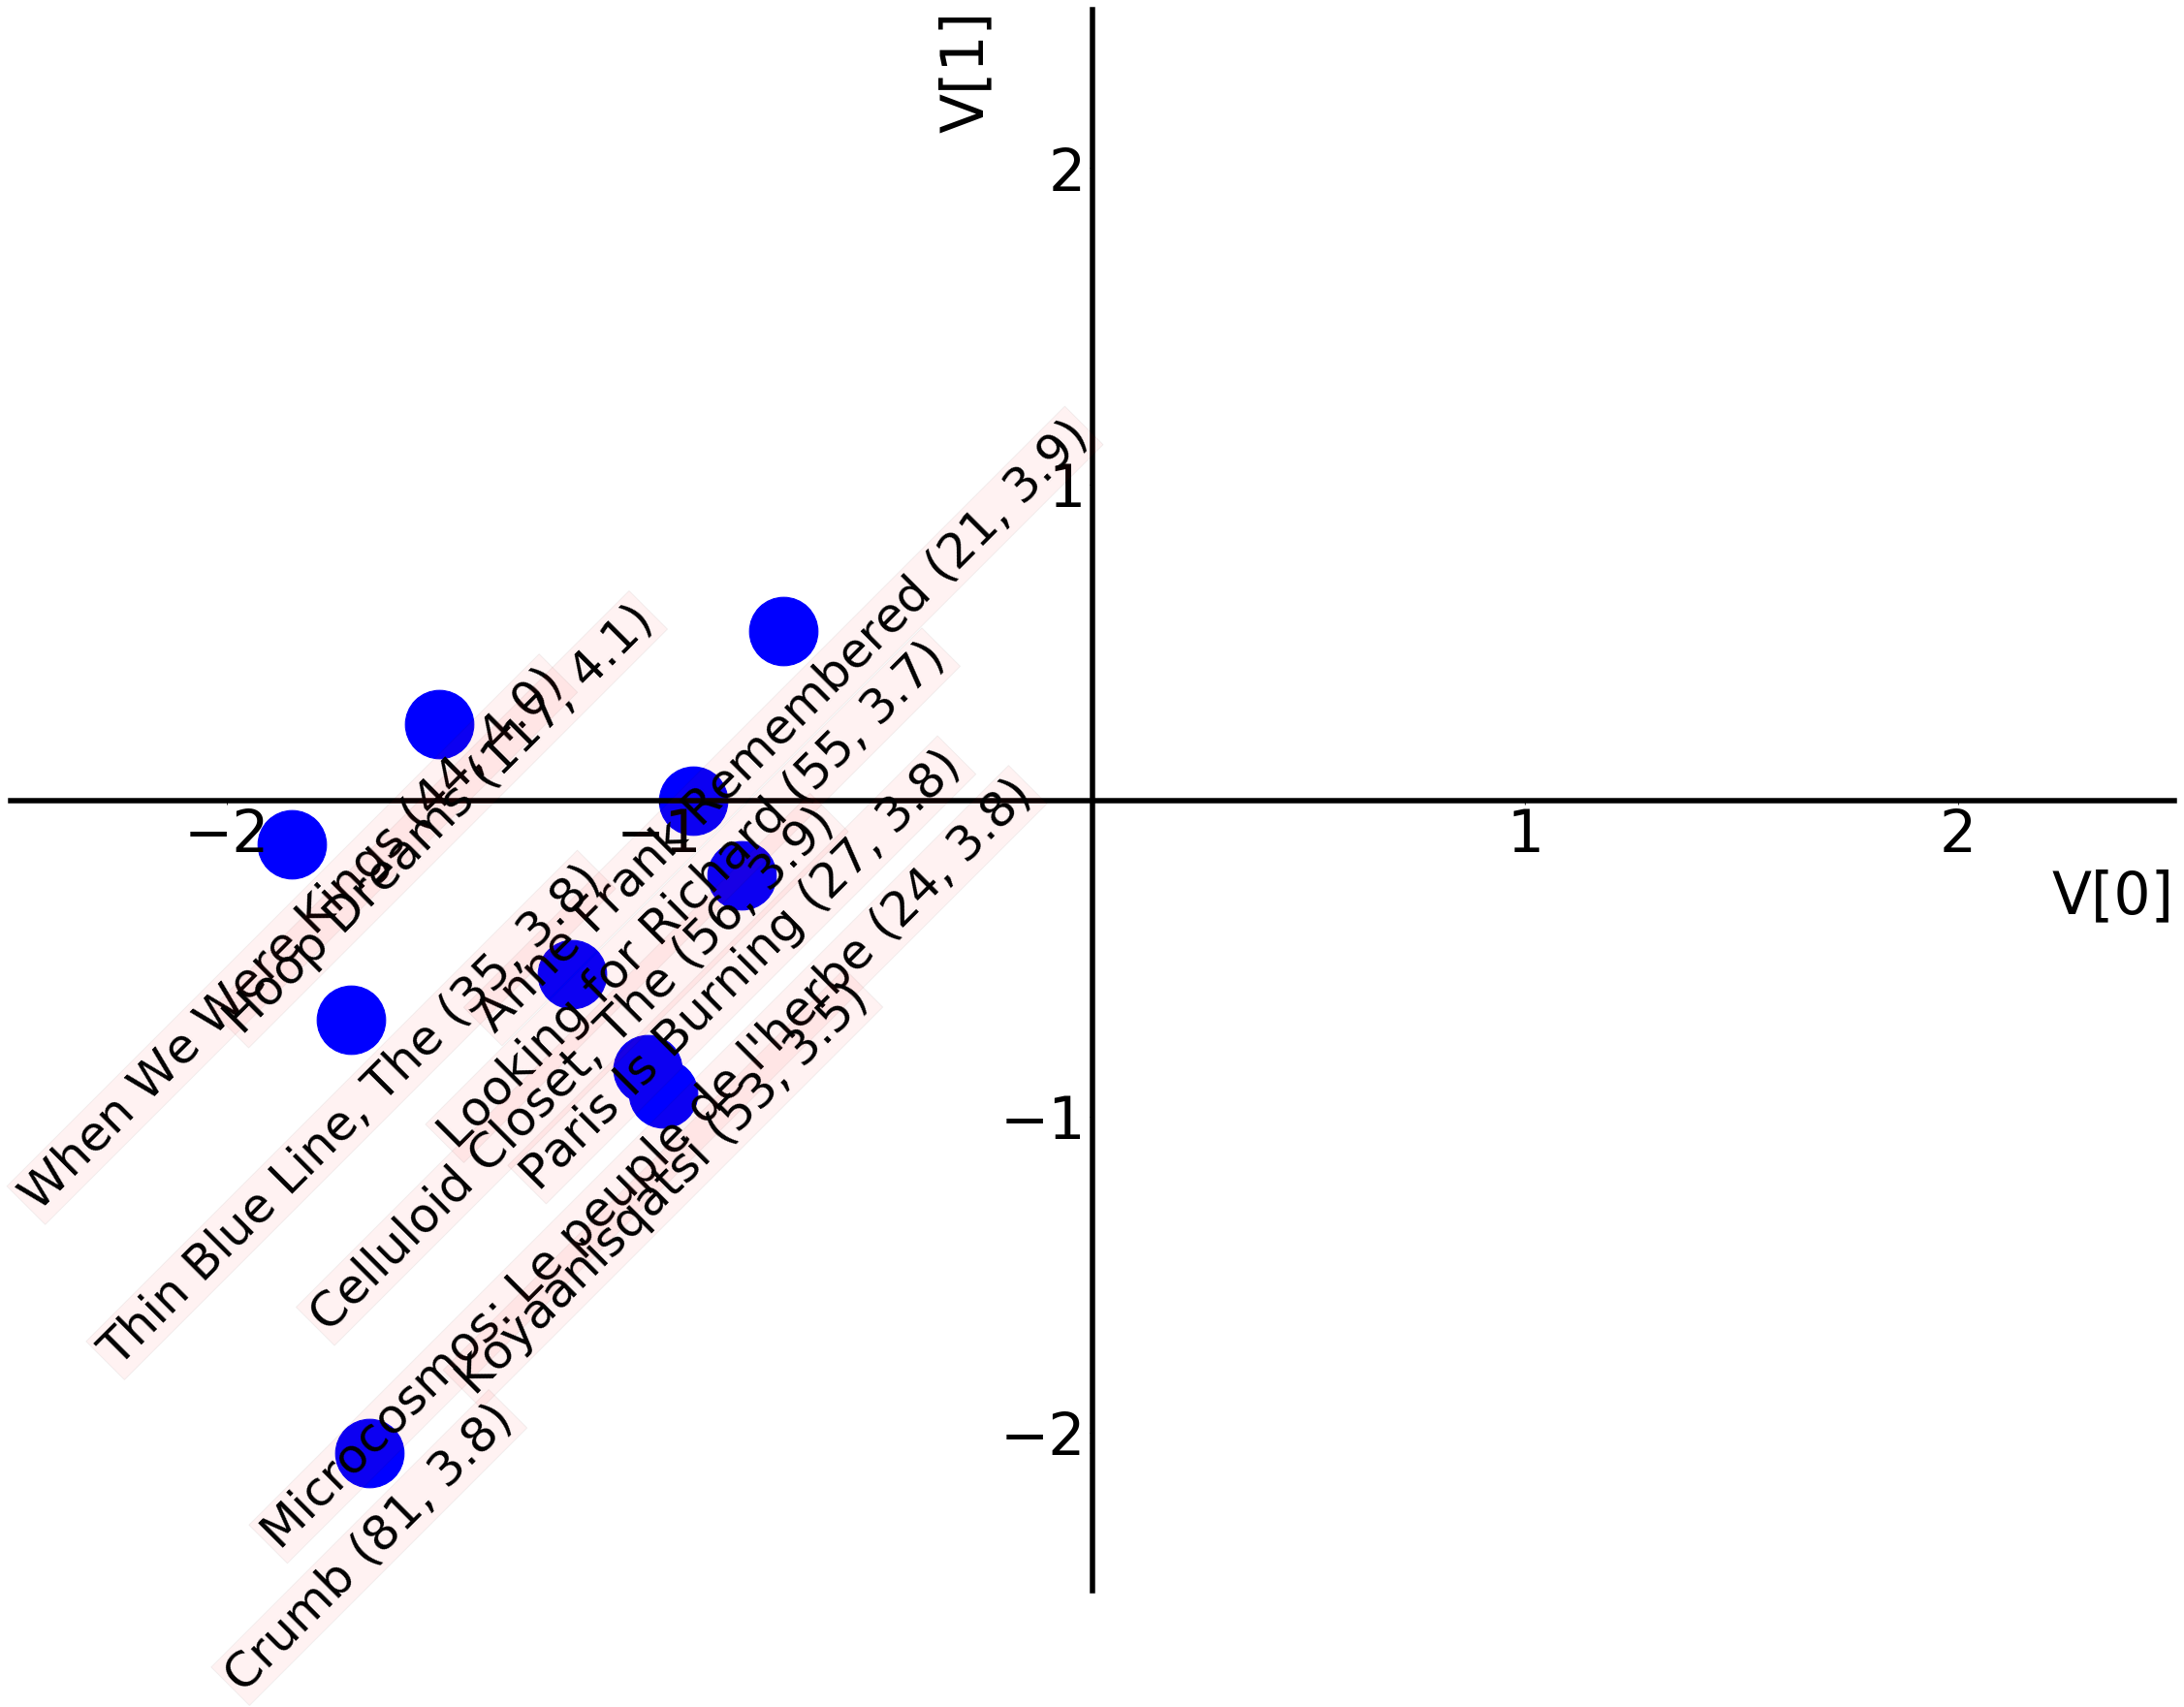

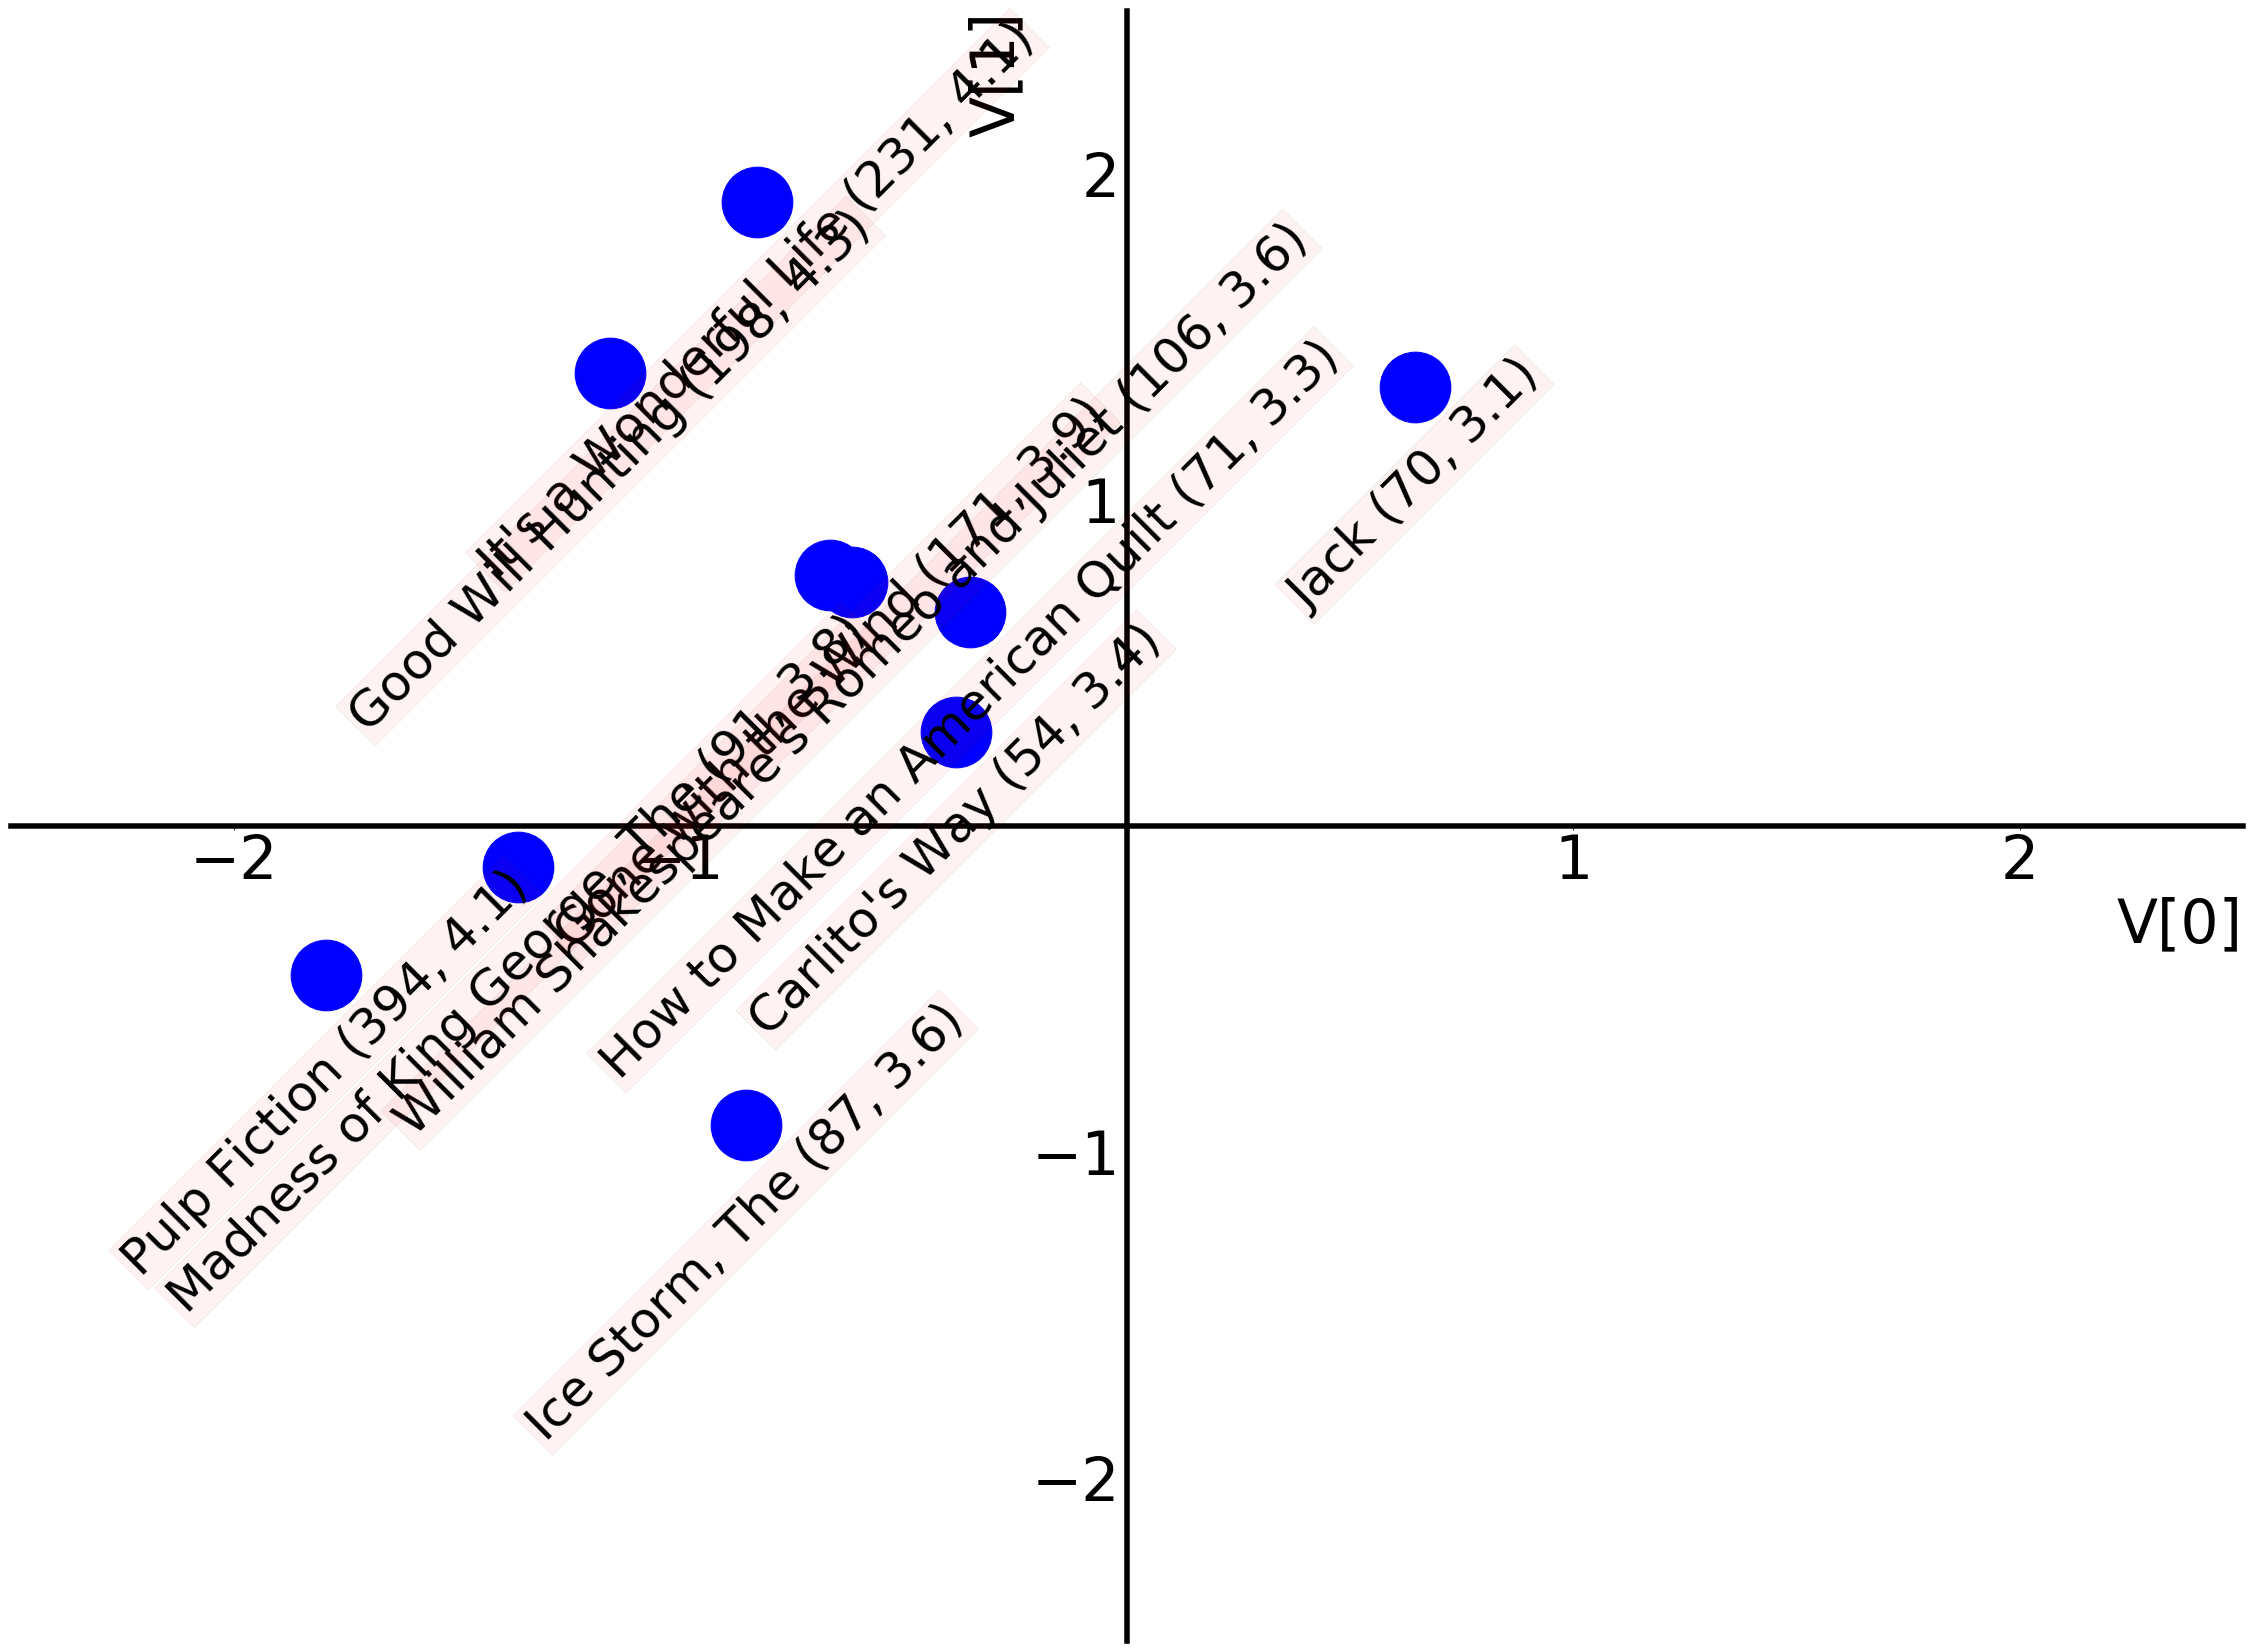

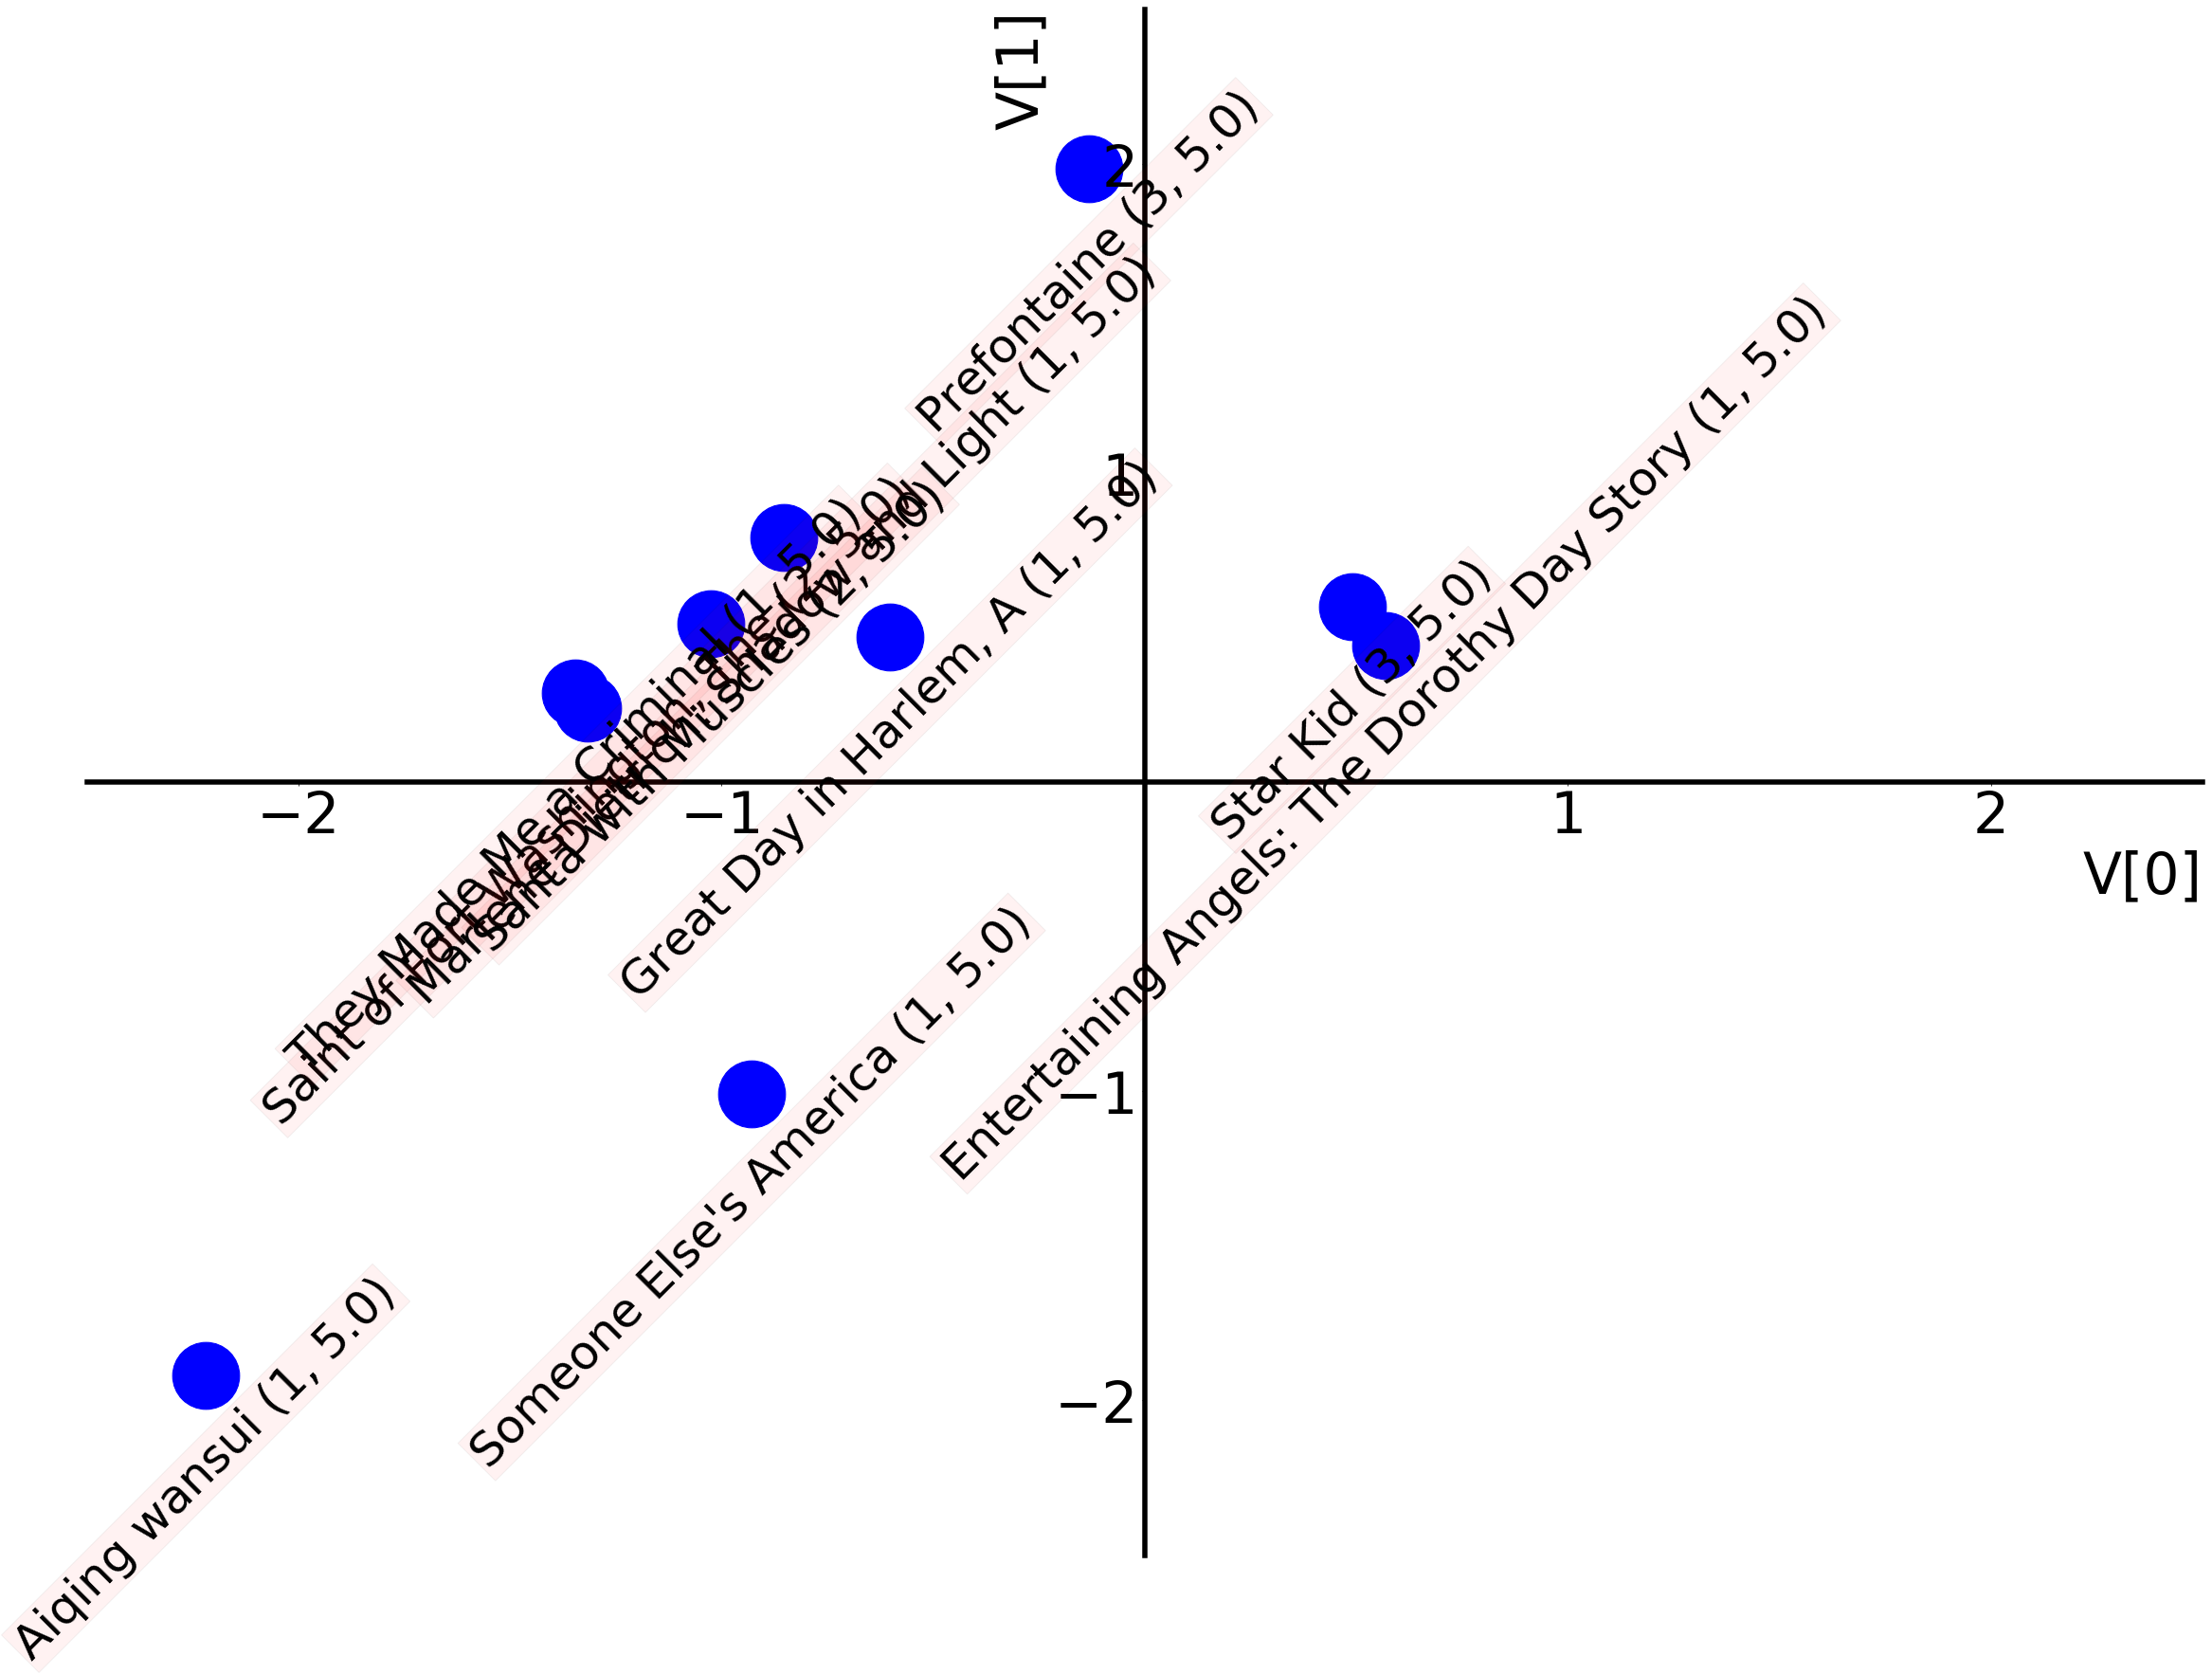

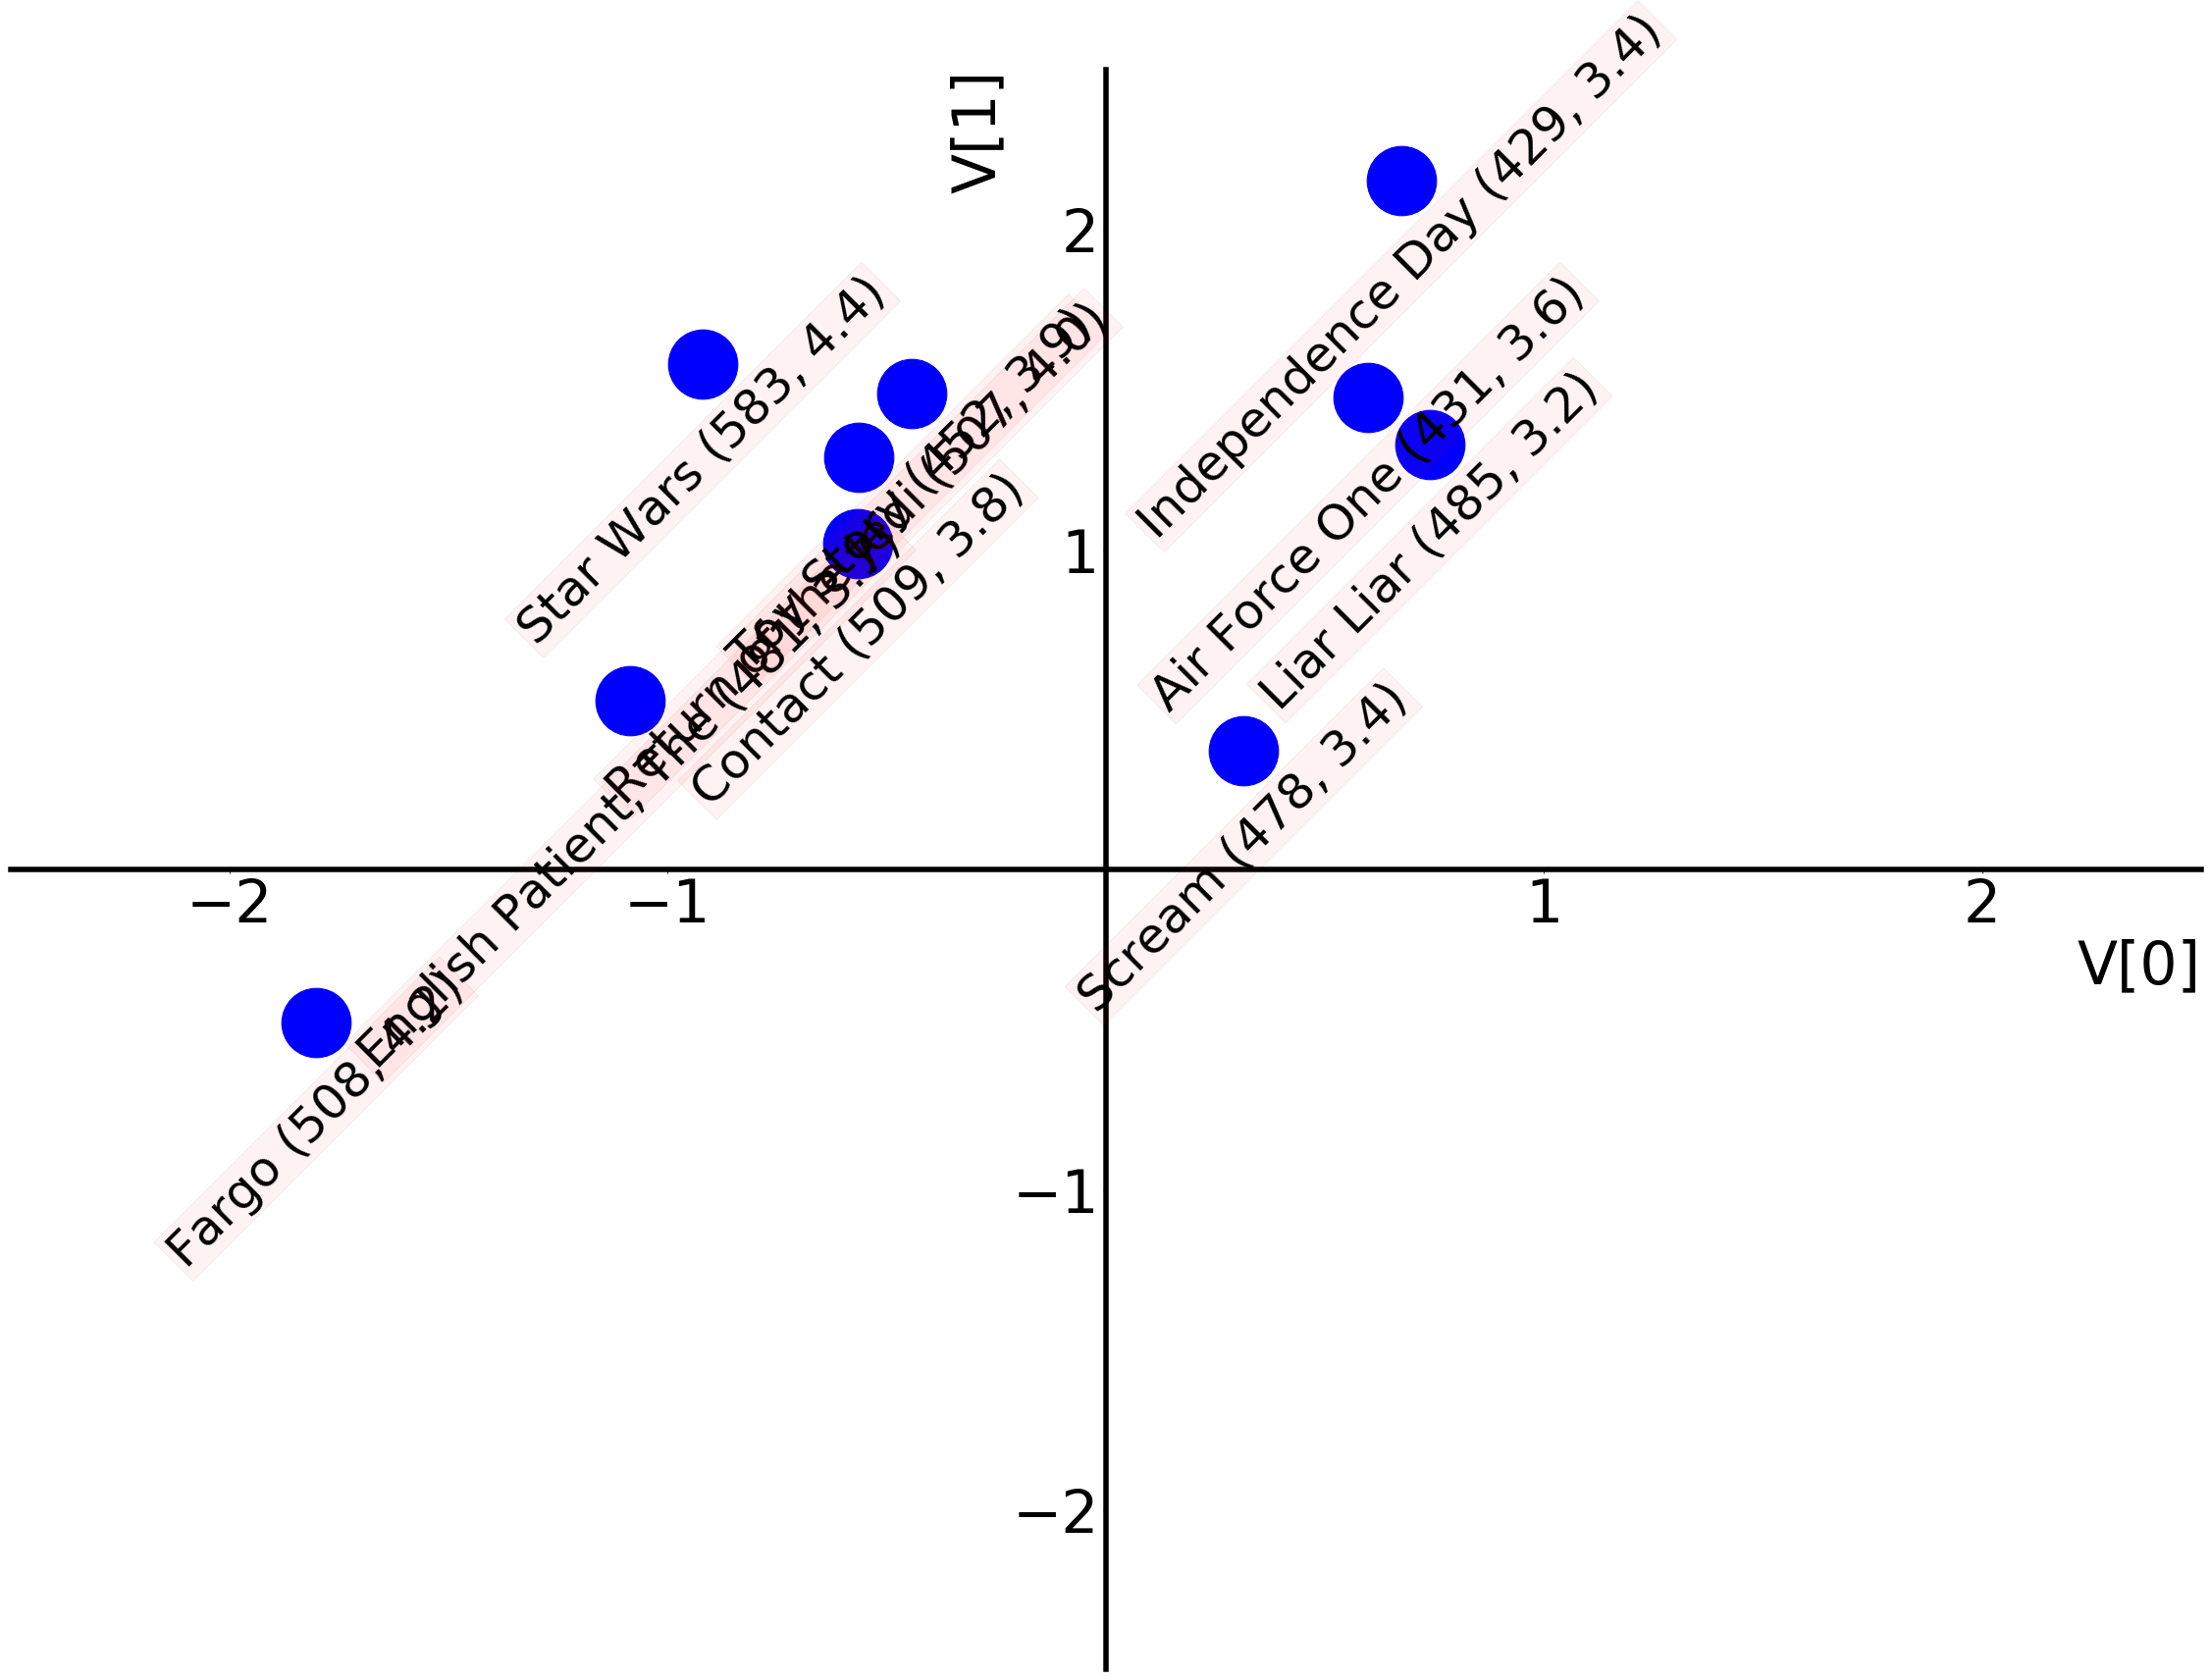

In [ ]:
## perform SVD to V and get the A, Sigma, B
U_bias = UT_bias.transpose()
V_bias = VT_bias.transpose()
Vp_bias = np.zeros_like(V_bias)
V_bias_row_means = np.mean(V_bias, axis=1)
for irow in range(len(V)):
    Vp_bias[irow] = V_bias[irow] - V_bias_row_means[irow]
A_bias, S_bias, B_bias =  np.linalg.svd(Vp_bias)
A12_bias = A_bias[:,[0,1]]
A12T_bias = A12_bias.transpose()
Vtilt_bias = np.matmul(A12T_bias, V_bias)

## visualize the movies of choices
visualize_V(Vtilt_bias, id_random10, name_random10, 'visualize_V_bias_random10movies')
visualize_V(Vtilt_bias, id_random10_action, name_random10_action, 'visualize_V_bias_random10movies_action')
visualize_V(Vtilt_bias, id_random10_documentary, name_random10_documentary, 'visualize_V_bias_random10movies_documentary')
visualize_V(Vtilt_bias, id_random10_drama, name_random10_drama, 'visualize_V_bias_random10movies_drama')
visualize_V(Vtilt_bias, id_best_10, name_best_10, 'visualize_V_bias_best10movies')
visualize_V(Vtilt_bias, id_most_popular_10, name_most_popular_10, 'visualize_V_bias_mostpopular10movies')

## Task 3: off-the-shelf: surprise

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import PredefinedKFold as pkf

import pandas as pd

In [ ]:
uid, mid, rating = np.loadtxt('./data/data.txt', delimiter='\t', usecols = (0,1,2), unpack = True)

ratings_dict = {'itemID': uid,
                'userID': mid,
                'rating': rating}

df = pd.DataFrame(ratings_dict)

reader = Reader(rating_scale=(1, 5))

# load data
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [ ]:
#use SVD algorithm.
algo = SVD()

param_grid = {'n_factors': [20], 'n_epochs': [20], 'lr_all': [0.001,0.01,0.02,0.03,0.04,0.05,0.1],
              'reg_all': [0.001,0.01,0.06,0.08,0.1,0.12,0.14,0.2,1]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

In [ ]:
# We can now use the algorithm that yields the best rmse:
algo = SVD(n_factors=20, n_epochs=300, lr_all=0.02, reg_all=0.1)
algo.fit(data.build_full_trainset())

In [ ]:
## perform SVD to V and get the A, Sigma, B
UT_surprise = algo.qi
VT_surprise = algo.pu

U_surprise = UT_surprise.transpose()
V_surprise = VT_surprise.transpose()
Vp_surprise = np.zeros_like(V_surprise)
V_surprise_row_means = np.mean(V_surprise, axis=1)
for irow in range(len(V_surprise)):
    Vp_surprise[irow] = V_surprise[irow] - V_surprise_row_means[irow]
A_surprise, S_surprise, B_surprise =  np.linalg.svd(Vp_surprise)
A12_surprise = A_surprise[:,[0,1]]
A12T_surprise = A12_surprise.transpose()
Vtilt_surprise = np.matmul(A12T, V_surprise)


## visualize the movies of choices
visualize_V(Vtilt_surprise, id_random10, name_random10, 'visualize_V_surprise_random10movies')
visualize_V(Vtilt_surprise, id_random10_action, name_random10_action, 'visualize_V_surprise_random10movies_action')
visualize_V(Vtilt_surprise, id_random10_documentary, name_random10_documentary, 'visualize_V_surprise_random10movies_documentary')
visualize_V(Vtilt_surprise, id_random10_drama, name_random10_drama, 'visualize_V_surprise_random10movies_drama')
visualize_V(Vtilt_surprise, id_best_10, name_best_10, 'visualize_V_surprise_best10movies')
visualize_V(Vtilt_surprise, id_most_popular_10, name_most_popular_10, 'visualize_V_surprise_mostpopular10movies')


## Additional visualization: average V[0] and V[1] for certain types of movies

In [ ]:

def averageV(Vtilt, ids):
    #normalize Vtilt such that each row has variance of 1.0
    Vtilt_row_means = np.mean(Vtilt, axis=1)
    Vtilt_row_std = np.std(Vtilt, axis=1)
    Vtiltp = np.zeros_like(Vtilt)
    for irow in range(len(Vtilt)):
        Vtiltp[irow] = np.divide(Vtilt[irow] - Vtilt_row_means[irow],Vtilt_row_std[irow])
    V0 = 0.0
    V1 = 0.0
    for idx in range(len(ids)):
        V0 += Vtiltp[0][ids[idx]]
        V1 += Vtiltp[1][ids[idx]]
    V0 = V0/len(ids)
    V1 = V1/len(ids)
    return V0, V1

##plot the average V[0] and V[1] for all the 19 types of movies
generes_all = ['Unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
V0_generes_all = np.zeros(len(generes_all))
V1_generes_all = np.zeros(len(generes_all))

V0_generes_all_bias = np.zeros(len(generes_all))
V1_generes_all_bias = np.zeros(len(generes_all))

V0_generes_all_surprise = np.zeros(len(generes_all))
V1_generes_all_surprise = np.zeros(len(generes_all))

for idx in range(len(generes_all)):
    ids_genere = [i for i in range(len(movies_all)) if movies_all[i][2+idx] ==1]
    V0_generes_all[idx],  V1_generes_all[idx]= averageV(Vtilt, ids_genere)
    V0_generes_all_bias[idx],  V1_generes_all_bias[idx]= averageV(Vtilt_bias, ids_genere)
    V0_generes_all_surprise[idx],  V1_generes_all_surprise[idx]= averageV(Vtilt_surprise, ids_genere)
#print(V0_generes_all)
#print(V1_generes_all)

visualize_V_CoM(V0_generes_all, V1_generes_all, generes_all, 'visualize_V_averageV_all_generes')
visualize_V_CoM(V0_generes_all_bias, V1_generes_all_bias, generes_all, 'visualize_V_bias_averageV_all_generes')
visualize_V_CoM(V0_generes_all_surprise, V1_generes_all_surprise, generes_all, 'visualize_V_surprise_averageV_all_generes')

##plot average V[0] and V[1] in bins of average ratings
range_rating = []
V0_ratings_all = np.zeros(10)
V1_ratings_all = np.zeros(10)
V0_ratings_all_bias = np.zeros(10)
V1_ratings_all_bias = np.zeros(10)
V0_ratings_all_surprise = np.zeros(10)
V1_ratings_all_surprise = np.zeros(10)
for idx in range(10):
    rating_low = 1.0 + idx*(5.0-1.0)/10
    rating_high = 1.0 + (idx+1)*(5.0-1.0)/10
    range_rating.append("%.1f $\leq$ $R$ < %.1f"%(rating_low, rating_high))
    ids_rating = [i for i in range(len(average_ratings_all)) if average_ratings_all[i] >= rating_low and average_ratings_all[i] < rating_high]
    V0_ratings_all[idx],  V1_ratings_all[idx]= averageV(Vtilt, ids_rating) 
    V0_ratings_all_bias[idx],  V1_ratings_all_bias[idx]= averageV(Vtilt_bias, ids_rating) 
    V0_ratings_all_surprise[idx],  V1_ratings_all_surprise[idx]= averageV(Vtilt_surprise, ids_rating) 
#print(range_rating)
#print(V0_ratings_all)
#print(V1_ratings_all)
visualize_V_CoM(V0_ratings_all, V1_ratings_all, range_rating, 'visualize_V_averageV_all_ratings')
visualize_V_CoM(V0_ratings_all_bias, V1_ratings_all_bias, range_rating, 'visualize_V_bias_averageV_all_ratings')
visualize_V_CoM(V0_ratings_all_surprise, V1_ratings_all_surprise, range_rating, 'visualize_V_surprise_averageV_all_ratings')


##plot average V[0] and V[1] in bins of average num of ratings
range_Nrating = []
V0_Nratings_all = np.zeros(10)
V1_Nratings_all = np.zeros(10)
V0_Nratings_all_bias = np.zeros(10)
V1_Nratings_all_bias = np.zeros(10)
V0_Nratings_all_surprise = np.zeros(10)
V1_Nratings_all_surprise = np.zeros(10)

for idx in range(10):
    Nrating_low = 0.0 + idx*(600.0-0.0)/10
    Nrating_high = 0.0 + (idx+1)*(600.0-0.0)/10
    range_Nrating.append("%.0f <  $N_{R}$ $\leq$ %.0f"%(Nrating_low, Nrating_high))
    ids_Nrating = [i for i in range(len(num_of_ratings_all)) if num_of_ratings_all[i] > Nrating_low and num_of_ratings_all[i] <= Nrating_high]
    #print(ids_Nrating)
    V0_Nratings_all[idx],  V1_Nratings_all[idx]= averageV(Vtilt, ids_Nrating) 
    V0_Nratings_all_bias[idx],  V1_Nratings_all_bias[idx]= averageV(Vtilt_bias, ids_Nrating) 
    V0_Nratings_all_surprise[idx],  V1_Nratings_all_surprise[idx]= averageV(Vtilt_surprise, ids_Nrating) 
#print(range_Nrating)
#print(V0_Nratings_all)
#print(V1_Nratings_all)
visualize_V_CoM(V0_Nratings_all, V1_Nratings_all, range_Nrating, 'visualize_V_averageV_all_num_of_ratings')
visualize_V_CoM(V0_Nratings_all_bias, V1_Nratings_all_bias, range_Nrating, 'visualize_V_bias_averageV_all_num_of_ratings')
visualize_V_CoM(V0_Nratings_all_surprise, V1_Nratings_all_surprise, range_Nrating, 'visualize_V_surprise_averageV_all_num_of_ratings')

